Reinforcement Learning

RL libraries for Time Series Forecating


1.   AutoTs
2.   Darts
3.   Kats
4.   GreyKite
5.   TsFresh



# Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('AirPassengers.csv')

In [3]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
data.isnull()

,Month,#Passengers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
139,False,False
140,False,False
141,False,False
142,False,False


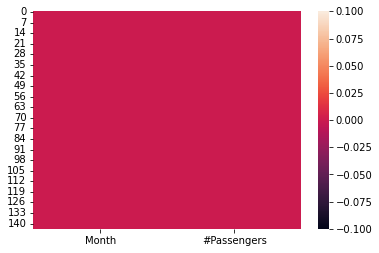

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


# Kats

Kats (Kits to Analyze Time Series) is an open-source Python library developed by researchers at Facebook (now Meta). This library is easy to use and is helpful for time series problems. This is due to its very light weighted library of generic time series analysis which allows to set up the models quicker without spending so much time processing time series and calculations in different models.

In [ ]:
!pip install kats

In [23]:
data

,month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [8]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams
data.columns = ['month','#Passengers']
data['month'] = pd.to_datetime(data['month'],infer_datetime_format=True,format='%y%m')
df_s = TimeSeriesData(time=data['month'], value=data['#Passengers'])
df_s

,month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative')
# create a prophet model instance
model = ProphetModel(df_s, params)
# fit model simply by calling m.fit()
model.fit()
# make prediction for next 30 month
forecast = model.predict(steps=30, freq="MS")
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,time,fcst,fcst_lower,fcst_upper
0,1961-01-01,451.765190,438.395440,464.096743
1,1961-02-01,433.212698,419.929813,445.667075
2,1961-03-01,492.254622,479.347315,506.742135
3,1961-04-01,495.496541,482.047698,508.554853
4,1961-05-01,504.186375,490.909704,516.536063
5,1961-06-01,579.977736,566.351321,593.453518
6,1961-07-01,654.295383,640.856260,666.937590
7,1961-08-01,650.455654,637.313855,664.119644
8,1961-09-01,553.650426,541.376335,567.019859
9,1961-10-01,489.740913,476.763060,502.807180


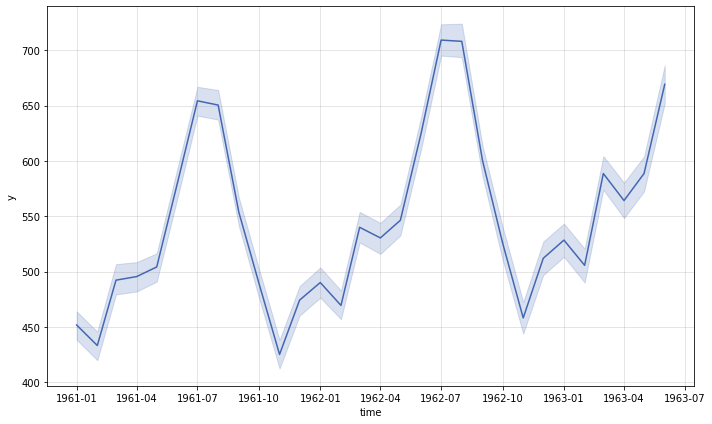

In [10]:
model.plot()

# AutoTs

AutoTS- Python time series tool, stands for Automatic Time Series, quickly providing high-accuracy forecasts at scale. It offers many different forecasting models and functions directly compatible with pandas’ data frames. 

In [ ]:
! pip install autots

In [12]:
from autots import AutoTS


In [13]:
from autots import AutoTS
model = AutoTS(forecast_length=12, frequency='infer',ensemble='simple')
model = model.fit(data, date_col='month', value_col='#Passengers', id_col=None)
prediction = model.predict()
#make predictions
forecast = prediction.forecast
print("Passengers Forecast")
print(forecast)

Inferred frequency is: MS
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
5/5 [==============================] - 12s 11ms/step - loss: 0.3799
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.3801
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.3794
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.3818
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.3812
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3801
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 0.3750
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 0.3777
Epoch 9/50
5/5 [==============================] - 0s 20ms/step - loss: 0.3831
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3747
Epoch 11/50
5/5 [==============================] - 0s 11ms/step - loss: 0.3779
Epoch 12/50
5/5 [==============================] - 0s 9ms/step - loss: 0.374

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 35 with model FBProphet in generation 0 of 10
Model Number: 36 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 36: GluonTS
Model Number: 37 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 38 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 38: MultivariateRegression
Model Number: 39 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 39: DatepartRegression
Model Number: 40 with model SeasonalNaive in generation 0 of 10
Model Number: 41 with model DatepartRegression in generation 0 of 10
Model Number: 42 with model UnobservedComponents in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model ETS in generation 0 of 10
Model Number: 45 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 45: VECM
Model Number: 46 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 54 with model FBProphet in generation 0 of 10
Model Number: 55 with model SeasonalNaive in generation 0 of 10
Model Number: 56 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


Model Number: 57 with model NVAR in generation 0 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 58 with model Theta in generation 0 of 10
Model Number: 59 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 59: UnivariateRegression
Model Number: 60 with model ConstantNaive in generation 0 of 10
Model Number: 61 with model LastValueNaive in generation 0 of 10
Model Number: 62 with model AverageValueNaive in generation 0 of 10
Model Number: 63 with model GLS in generation 0 of 10
Model Number: 64 with model SeasonalNaive in generation 0 of 10
Model Number: 65 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 65: GLM
Model Number: 66 with model ETS in generation 0 of 10
Model Number: 67 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 68 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 68: GluonTS
Model Number: 69 with model UnobservedComponents in generation 0 of 10
Model Number: 70 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 70: VAR
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 71: VECM
Model Number: 72 with model WindowRegression in generation 0 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 72: WindowRegression
Model Number: 73 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 73: DatepartRegression
Model Number: 74 with model UnivariateRegression in generation 0 of 10
Model Number:

/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 81 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 81: ARDL
Model Number: 82 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 82: VAR
Model Number: 83 with model WindowRegression in generation 0 of 10
Model Number: 84 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 84: GLM
Model Number: 85 with model NVAR in generation 0 of 10
Model Number: 86 with model LastValueNaive in generation 0 of 10
Model Number: 87 with model LastValueNaive in generation 0 of 10
Model Number: 88 with model LastValueNaive in generation 0 of 10
Model Number: 89 with model LastValueNaive in generation 0 

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce



Model Number: 110 with model ConstantNaive in generation 0 of 10
Model Number: 111 with model NVAR in generation 0 of 10
Model Number: 112 with model ConstantNaive in generation 0 of 10
Model Number: 113 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 114 with model ConstantNaive in generation 0 of 10
Model Number: 115 with model DatepartRegression in generation 0 of 10
Epoch 1/50
2/2 [==============================] - 6s 18ms/step - loss: 98.5201
Epoch 2/50
2/2 [==============================] - 0s 14ms/step - loss: 97.7304
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 98.1111
Epoch 4/50
2/2 [==============================] - 0s 13ms/step - loss: 97.1792
Epoch 5/50
2/2 [==============================] - 0s 13ms/step - loss: 97.0020
Epoch 6/50
2/2 [==============================] - 0s 14ms/step - loss: 99.1413
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 97.9287
Epoch 8/50
2/2 [==============================] - 0s 13ms/step - loss: 97.9134
Epoch 9/50
2/2 [==============================] - 0s 14ms/step - loss: 97.9954
Epoch 10/50
2/2 [==============================] - 0s 13ms/step - loss: 97.2138
Epoch 11/50
2/2 [==============================] - 0s 13ms/step - loss: 98

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 116 with model FBProphet in generation 0 of 10
Model Number: 117 with model ETS in generation 0 of 10
Model Number: 118 with model ConstantNaive in generation 0 of 10
Model Number: 119 with model UnivariateMotif in generation 0 of 10
Model Number: 120 with model ConstantNaive in generation 0 of 10
Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model SeasonalNaive in generation 0 of 10
Model Number: 123 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 123: VAR
Model Number: 124 with model GLS in generation 0 of 10
Model Number: 125 with model WindowRegression in generation 0 of 10
Epoch 1/50
8/8 [==============================] - 5s 5ms/step - loss: nan
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: nan


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 139 with model LastValueNaive in generation 0 of 10
Model Number: 140 with model MultivariateMotif in generation 0 of 10
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 143 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 143: ARDL
Model Number: 144 with model DatepartRegression in generation 0 of 10
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 146: VAR
Model Number: 147 with model SeasonalNaive in generation 0 of 10
Model 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 155 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 155: GluonTS
Model Number: 156 with model VAR in generation 0 of 10
Template Eval Error: IndexError('tuple index out of range') in model 156: VAR
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Model Number: 158 with model GLS in generation 0 of 10
Model Number: 159 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 159: GLM
Model Number: 160 with model LastValueNaive in generation 0 of 10
Model Number: 161 with model MultivariateMotif in generation 0 of 10
Model Number: 162 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 162: VAR
Model Number: 163 with model LastValueNaive in generation 0 of 10
Model Number: 164 with model

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 165 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 165: GluonTS
Model Number: 166 with model MultivariateMotif in generation 0 of 10
Model Number: 167 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 167: ARDL
Model Number: 168 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 168: SectionalMotif
Model Number: 169 with model AverageValueNaive in generation 0 of 10
New Generation: 1 of 10
Model Number: 170 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 170: DatepartRegression
Model Number: 171 with model Theta in generation 1 of 10
Model Number: 172 with model Theta in

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 189 with model ETS in generation 1 of 10
Model Number: 190 with model UnivariateMotif in generation 1 of 10
Model Number: 191 with model SeasonalNaive in generation 1 of 10
Model Number: 192 with model Theta in generation 1 of 10
Model Number: 193 with model ETS in generation 1 of 10
Model Number: 194 with model NVAR in generation 1 of 10
Model Number: 195 with model AverageValueNaive in generation 1 of 10
Model Number: 196 with model ConstantNaive in generation 1 of 10
Model Number: 197 with model SeasonalNaive in generation 1 of 10
Model Number: 198 with model ETS in generation 1 of 10
Model Number: 199 with model WindowRegression in generation 1 of 10
Model Number: 200 with model Theta in generation 1 of 10
Model Number: 201 with model ConstantNaive in generation 1 of 10
Model Number: 202 with model LastValueNaive in generation 1 of 10
Model Number: 203 with model LastValueNaive in generation 1 of 10
Model Number: 204 with model SeasonalNaive in generation 1 of 10
Mode

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/

Model Number: 208 with model WindowRegression in generation 1 of 10
Model Number: 209 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 209: DatepartRegression
Model Number: 210 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 210: DatepartRegression
Model Number: 211 with model Theta in generation 1 of 10
Model Number: 212 with model SeasonalNaive in generation 1 of 10
Model Number: 213 with model ETS in generation 1 of 10
Model Number: 214 with model GLS in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 215 with model LastValueNaive in generation 1 of 10
Model Number: 216 with model SectionalMotif in generation 1 of 10
Model Number: 217 with model UnivariateMotif in generation 1 of 10
Model Number: 218 with model GLS in generation 1 of 10
Model Number: 219 with model MultivariateMotif in generation 1 of 10
Model Number: 220 with model UnobservedComponents in generation 1 of 10
Model Number: 221 with model AverageValueNaive in generation 1 of 10
Model Number: 222 with model ConstantNaive in generation 1 of 10
Model Number: 223 with model SeasonalNaive in generation 1 of 10
Model Number: 224 with model MultivariateRegression in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/

Model Number: 225 with model MultivariateMotif in generation 1 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 226 with model SeasonalNaive in generation 1 of 10
Model Number: 227 with model ConstantNaive in generation 1 of 10
Model Number: 228 with model ConstantNaive in generation 1 of 10
Model Number: 229 with model LastValueNaive in generation 1 of 10
Model Number: 230 with model SectionalMotif in generation 1 of 10
Model Number: 231 with model WindowRegression in generation 1 of 10
Model Number: 232 with model SectionalMotif in generation 1 of 10
Model Number: 233 with model WindowRegression in generation 1 of 10
Model Number: 234 with model ETS in generation 1 of 10
Model Number: 235 with model MultivariateMotif in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 236 with model UnivariateRegression in generation 1 of 10
Model Number: 237 with model UnobservedComponents in generation 1 of 10
Model Number: 238 with model WindowRegression in generation 1 of 10
Model Number: 239 with model WindowRegression in generation 1 of 10
Model Number: 240 with model SeasonalNaive in generation 1 of 10
Model Number: 241 with model SeasonalNaive in generation 1 of 10
Template Eval Error: ValueError('Model SeasonalNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 241: SeasonalNaive
Model Number: 242 with model AverageValueNaive in generation 1 of 10
Model Number: 243 with model LastValueNaive in generation 1 of 10
Model Number: 244 with model UnivariateMotif in generation 1 of 10
Model Number: 245 with model MultivariateRegression in generation 1 of 10
Model Number: 246 with model LastValueNaive in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn

Model Number: 247 with model DatepartRegression in generation 1 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 247: DatepartRegression
Model Number: 248 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 249 with model FBProphet in generation 1 of 10
Model Number: 250 with model AverageValueNaive in generation 1 of 10
Model Number: 251 with model NVAR in generation 1 of 10
Model Number: 252 with model UnobservedComponents in generation 1 of 10
Model Number: 253 with model ConstantNaive in generation 1 of 10
Model Number: 254 with model ConstantNaive in generation 1 of 10
Model Number: 255 with model LastValueNaive in generation 1 of 10
Model Number: 256 with model SeasonalNaive in generation 1 of 10
Model Number: 257 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 0 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/

Model Number: 258 with model MultivariateRegression in generation 1 of 10
Model Number: 259 with model ETS in generation 1 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 260 with model FBProphet in generation 1 of 10
Model Number: 261 with model UnobservedComponents in generation 1 of 10
Model Number: 262 with model WindowRegression in generation 1 of 10
Epoch 1/50
8/8 [==============================] - 6s 5ms/step - loss: nan
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 10/50
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 11/50
8/8 [==============================] - 0s 6ms/

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



Epoch 1/50
5/5 [==============================] - 6s 7ms/step - loss: 102.5745
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 100.0933
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 100.8067
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 99.6112
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 100.7908
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 100.5312
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 100.4980
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 100.2294
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 99.4614
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 99.6461
Epoch 11/50
5/5 [==============================] - 0s 8ms/step - loss: 100.4938
Epoch 12/50
5/5 [==============================] - 0s 6ms/step - loss: 99.3488
Epoch 13/50
5/5 [==============================] - 0s

Model Number: 270 with model UnivariateMotif in generation 1 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 271 with model FBProphet in generation 1 of 10
Model Number: 272 with model UnobservedComponents in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 272: UnobservedComponents
Model Number: 273 with model GLS in generation 1 of 10
Model Number: 274 with model SeasonalNaive in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 275 with model FBProphet in generation 1 of 10
Model Number: 276 with model DatepartRegression in generation 1 of 10
Model Number: 277 with model SectionalMotif in generation 1 of 10
Model Number: 278 with model SectionalMotif in generation 1 of 10
Model Number: 279 with model LastValueNaive in generation 1 of 10
New Generation: 2 of 10
Model Number: 280 with model SeasonalNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

INFO:prophet:Disabling we

Model Number: 281 with model FBProphet in generation 2 of 10
Model Number: 282 with model SeasonalNaive in generation 2 of 10
Model Number: 283 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 283: UnivariateRegression
Model Number: 284 with model DatepartRegression in generation 2 of 10
Model Number: 285 with model Theta in generation 2 of 10
Model Number: 286 with model LastValueNaive in generation 2 of 10
Model Number: 287 with model UnobservedComponents in generation 2 of 10
Model Number: 288 with model UnobservedComponents in generation 2 of 10
Model Number: 289 with model UnivariateMotif in generation 2 of 10
Model Number: 290 with model UnivariateMotif in generation 2 of 10
Model Number: 291 with model NVAR in generation 2 of 10
Model Number: 292 with model SectionalMotif in generation 2 of 10
Model Number: 293 with model LastValueNaive in generation 2 of 10
Model Number: 2

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 296 with model SeasonalNaive in generation 2 of 10
Model Number: 297 with model MultivariateMotif in generation 2 of 10
Model Number: 298 with model SeasonalNaive in generation 2 of 10
Model Number: 299 with model Theta in generation 2 of 10
Model Number: 300 with model SeasonalNaive in generation 2 of 10
Model Number: 301 with model WindowRegression in generation 2 of 10
Model Number: 302 with model AverageValueNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 303 with model Theta in generation 2 of 10
Model Number: 304 with model ConstantNaive in generation 2 of 10
Model Number: 305 with model WindowRegression in generation 2 of 10
Model Number: 306 with model DatepartRegression in generation 2 of 10
Model Number: 307 with model WindowRegression in generation 2 of 10
Model Number: 308 with model Theta in generation 2 of 10
Model Number: 309 with model ETS in generation 2 of 10
Model Number: 310 with model LastValueNaive in generation 2 of 10
Model Number: 311 with model Theta in generation 2 of 10
Model Number: 312 with model Theta in generation 2 of 10
Model Number: 313 with model DatepartRegression in generation 2 of 10
Model Number: 314 with model ConstantNaive in generation 2 of 10
Model Number: 315 with model UnivariateMotif in generation 2 of 10
Model Number: 316 with model ConstantNaive in generation 2 of 10
Model Number: 317 with model SeasonalNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 318 with model GLS in generation 2 of 10
Model Number: 319 with model Theta in generation 2 of 10
Model Number: 320 with model WindowRegression in generation 2 of 10
Model Number: 321 with model MultivariateRegression in generation 2 of 10
Model Number: 322 with model ConstantNaive in generation 2 of 10
Model Number: 323 with model ETS in generation 2 of 10
Model Number: 324 with model ETS in generation 2 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
Model Number: 325 with model SeasonalNaive in generation 2 of 10
Model Number: 326 with model UnivariateMotif in generation 2 of 10
Model Number: 327 with model NVAR in generation 2 of 10
Model Number: 328 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 328: ConstantNaive
Model Number: 329 with model DatepartRegression in generation 2 of 10
Templ

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/skl

Model Number: 332 with model MultivariateRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 333 with model WindowRegression in generation 2 of 10
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 333: WindowRegression
Model Number: 334 with model Theta in generation 2 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 335 with model FBProphet in generation 2 of 10
Model Number: 336 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 336: WindowRegression
Model Number: 337 with model Theta in generation 2 of 10
Model Number: 338 with model LastValueNaive in generation 2 of 10
Model Number: 339 with model SeasonalNaive in generation 2 of 10
Model Number: 340 with model SeasonalNaive in generation 2 of 10
Model Number: 341 with model GLS in generation 2 of 10
Model Number: 342 with model ConstantNaive in generation 2 of 10
Model Number: 343 with model FBProphet in generation 2 of 10

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 344 with model FBProphet in generation 2 of 10
Model Number: 345 with model UnobservedComponents in generation 2 of 10
Model Number: 346 with model UnobservedComponents in generation 2 of 10
Model Number: 347 with model ETS in generation 2 of 10
Model Number: 348 with model UnobservedComponents in generation 2 of 10
Model Number: 349 with model AverageValueNaive in generation 2 of 10
Model Number: 350 with model LastValueNaive in generation 2 of 10
Model Number: 351 with model WindowRegression in generation 2 of 10
Model Number: 352 with model UnivariateMotif in generation 2 of 10
Model Number: 353 with model WindowRegression in generation 2 of 10
Model Number: 354 with model NVAR in generation 2 of 10
Model Number: 355 with model MultivariateMotif in generation 2 of 10
Model Number: 356 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 356: LastValueNaive
Model Number: 357 with model SeasonalNaive

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

INFO:prophet:Disabling we

Model Number: 358 with model FBProphet in generation 2 of 10
Model Number: 359 with model LastValueNaive in generation 2 of 10
Model Number: 360 with model SectionalMotif in generation 2 of 10
Model Number: 361 with model SeasonalNaive in generation 2 of 10
Model Number: 362 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 362: LastValueNaive
Model Number: 363 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 364 with model DatepartRegression in generation 2 of 10
Model Number: 365 with model LastValueNaive in generation 2 of 10
Model Number: 366 with model MultivariateMotif in generation 2 of 10
Model Number: 367 with model AverageValueNaive in generation 2 of 10
Model Number: 368 with model AverageValueNaive in generation 2 of 10
Model Number: 369 with model ETS in generation 2 of 10
Model Number: 370 with model Theta in generation 2 of 10
Model Number: 371 with model MultivariateMotif in generation 2 of 10
Model Number: 372 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 372: MultivariateRegression
Model Number: 373 with model MultivariateRegression in generation 2 of 10
Model Number: 374 with model MultivariateMotif in generation 2 of 10
Model Number: 375 with model NVAR in generation 2 of 10
Model Number: 376 with model GLS in generation 2 of 10
Model Number: 377 

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 380 with model DatepartRegression in generation 2 of 10
Model Number: 381 with model SectionalMotif in generation 2 of 10
Model Number: 382 with model GLS in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 382: GLS
Model Number: 383 with model WindowRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 384 with model WindowRegression in generation 2 of 10
Model Number: 385 with model UnobservedComponents in generation 2 of 10
Model Number: 386 with model UnivariateMotif in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 387 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("loss='poisson' requires non-negative y and sum(y) > 0.") in model 387: MultivariateRegression
Model Number: 388 with model AverageValueNaive in generation 2 of 10
Model Number: 389 with model UnobservedComponents in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



New Generation: 3 of 10
Model Number: 390 with model UnobservedComponents in generation 3 of 10
Model Number: 391 with model Theta in generation 3 of 10
Model Number: 392 with model SectionalMotif in generation 3 of 10
Model Number: 393 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 393: WindowRegression
Model Number: 394 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 394: GLS
Model Number: 395 with model MultivariateMotif in generation 3 of 10
Model Number: 396 with model GLS in generation 3 of 10
Model Number: 397 with model UnivariateMotif in generation 3 of 10
Model Number: 398 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 398: WindowRegression
Model Number: 399 with model MultivariateMotif in generation 3 of 10
Model N

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 403 with model ConstantNaive in generation 3 of 10
Model Number: 404 with model UnivariateMotif in generation 3 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 405 with model MultivariateMotif in generation 3 of 10
Model Number: 406 with model ETS in generation 3 of 10
Model Number: 407 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 408 with model GLS in generation 3 of 10
Model Number: 409 with model UnobservedComponents in generation 3 of 10
Model Number: 410 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 410: LastValueNaive
Model Number: 411 with model UnobservedComponents in generation 3 of 10
Model Number: 412 with model MultivariateRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 413 with model GLS in generation 3 of 10
Model Number: 414 with model SeasonalNaive in generation 3 of 10
Model Number: 415 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 415: FBProphet
Model Number: 416 with model AverageValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 416: AverageValueNaive
Model Number: 417 with model SeasonalNaive in generation 3 of 10
Model Number: 418 with model SeasonalNaive in generation 3 of 10
Model Number: 419 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 419: SeasonalNaive
Model Number: 420 with model GLS in generation 3 of 10
Model Number: 421 with model DatepartRegression in generation 3 of 10
Model Number: 422 with model UnobservedComponents in generation 3 of 10
Model Number: 423 with model LastValueNaive in generation 3 of 10
Model Numb

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 425 with model LastValueNaive in generation 3 of 10
Model Number: 426 with model SeasonalNaive in generation 3 of 10
Model Number: 427 with model GLS in generation 3 of 10
Model Number: 428 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 429 with model SectionalMotif in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 430 with model Theta in generation 3 of 10
Model Number: 431 with model MultivariateMotif in generation 3 of 10
Model Number: 432 with model NVAR in generation 3 of 10
Model Number: 433 with model DatepartRegression in generation 3 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 434 with model FBProphet in generation 3 of 10
Model Number: 435 with model UnobservedComponents in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 436 with model FBProphet in generation 3 of 10
Model Number: 437 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 437: ETS
Model Number: 438 with model WindowRegression in generation 3 of 10
Model Number: 439 with model SeasonalNaive in generation 3 of 10
Model Number: 440 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 440: DatepartRegression
Model Number: 441 with model DatepartRegression in generation 3 of 10
Model Number: 442 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 443 with model ConstantNaive in generation 3 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 444 with model FBProphet in generation 3 of 10
Model Number: 445 with model Theta in generation 3 of 10
Model Number: 446 with model Theta in generation 3 of 10
Model Number: 447 with model UnobservedComponents in generation 3 of 10
Model Number: 448 with model Theta in generation 3 of 10
Model Number: 449 with model DatepartRegression in generation 3 of 10
Model Number: 450 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 450: DatepartRegression
Model Number: 451 with model MultivariateMotif in generation 3 of 10
Model Number: 452 with model WindowRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 453 with model NVAR in generation 3 of 10
Model Number: 454 with model SectionalMotif in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 455 with model Theta in generation 3 of 10
Model Number: 456 with model SeasonalNaive in generation 3 of 10
Model Number: 457 with model LastValueNaive in generation 3 of 10
Model Number: 458 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 458: DatepartRegression
Model Number: 459 with model AverageValueNaive in generation 3 of 10
Model Number: 460 with model UnivariateMotif in generation 3 of 10
Model Number: 461 with model MultivariateMotif in generation 3 of 10
Model Number: 462 with model Theta in generation 3 of 10
Model Number: 463 with model WindowRegression in generation 3 of 10
Model Number: 464 with model WindowRegression in generation 3 of 10
Model Number: 465 with model NVAR in generation 3 of 10
Model Number: 466 with model UnobservedComponents in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 467 with model UnivariateMotif in generation 3 of 10
Model Number: 468 with model Theta in generation 3 of 10
Model Number: 469 with model DatepartRegression in generation 3 of 10
Epoch 1/50
7/7 [==============================] - 6s 183ms/step - loss: 2.7514 - val_loss: 1.4594
Epoch 2/50
7/7 [==============================] - 1s 94ms/step - loss: 1.8444 - val_loss: 0.5624
Epoch 3/50
7/7 [==============================] - 1s 96ms/step - loss: 1.9910 - val_loss: 0.4760
Epoch 4/50
7/7 [==============================] - 1s 93ms/step - loss: 1.5210 - val_loss: 0.4660
Epoch 5/50
7/7 [==============================] - 1s 94ms/step - loss: 1.6136 - val_loss: 0.4066
Epoch 6/50
7/7 [==============================] - 1s 97ms/step - loss: 1.6888 - val_loss: 0.3469
Epoch 7/50
7/7 [==============================] - 1s 97ms/step - loss: 1.6832 - val_loss: 0.3246
Epoch 8/50
7/7 [==============================] - 1s 96ms/step - loss: 2.0667 - val_loss: 0.3260
Epoch 9/50
7/7 [=============

Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 469: DatepartRegression
Model Number: 470 with model UnivariateMotif in generation 3 of 10
Model Number: 471 with model AverageValueNaive in generation 3 of 10
Model Number: 472 with model DatepartRegression in generation 3 of 10
Model Number: 473 with model SeasonalNaive in generation 3 of 10
Model Number: 474 with model MultivariateMotif in generation 3 of 10
Model Number: 475 with model MultivariateMotif in generation 3 of 10
Model Number: 476 with model SeasonalNaive in generation 3 of 10
Model Number: 477 with model MultivariateRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 478 with model NVAR in generation 3 of 10
Model Number: 479 with model LastValueNaive in generation 3 of 10
Model Number: 480 with model UnobservedComponents in generation 3 of 10
Model Number: 481 with model NVAR in generation 3 of 10
Model Number: 482 with model GLM in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 482: GLM
Model Number: 483 with model WindowRegression in generation 3 of 10
Model Number: 484 with model Theta in generation 3 of 10
Model Number: 485 with model LastValueNaive in generation 3 of 10
Model Number: 486 with model MultivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 486: MultivariateRegression
Model Number: 487 with model ConstantNaive in generation 3 of 10
Model Number: 488 with model AverageValueNaive in generation 3 of 10
Model Number: 489 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError('Some value

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 500 with model MultivariateMotif in generation 4 of 10
Model Number: 501 with model DatepartRegression in generation 4 of 10
Model Number: 502 with model WindowRegression in generation 4 of 10
Model Number: 503 with model ConstantNaive in generation 4 of 10
Model Number: 504 with model AverageValueNaive in generation 4 of 10
Model Number: 505 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

[Parallel(n_jobs=-2)]: Us

Model Number: 506 with model SeasonalNaive in generation 4 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 507 with model FBProphet in generation 4 of 10
Model Number: 508 with model GLS in generation 4 of 10
Model Number: 509 with model DatepartRegression in generation 4 of 10
Model Number: 510 with model UnivariateMotif in generation 4 of 10
Model Number: 511 with model UnobservedComponents in generation 4 of 10
Model Number: 512 with model UnobservedComponents in generation 4 of 10
Model Number: 513 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 513: WindowRegression
Model Number: 514 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 515 with model AverageValueNaive in generation 4 of 10
Model Number: 516 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 517 with model MultivariateMotif in generation 4 of 10
Model Number: 518 with model SeasonalNaive in generation 4 of 10
Model Number: 519 with model GLS in generation 4 of 10
Model Number: 520 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n

Model Number: 521 with model SeasonalNaive in generation 4 of 10
Model Number: 522 with model MultivariateMotif in generation 4 of 10
Model Number: 523 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 523: WindowRegression
Model Number: 524 with model DatepartRegression in generation 4 of 10
Model Number: 525 with model MultivariateMotif in generation 4 of 10
Model Number: 526 with model DatepartRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/

Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 526: DatepartRegression
Model Number: 527 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 527: MultivariateRegression
Model Number: 528 with model AverageValueNaive in generation 4 of 10
Model Number: 529 with model WindowRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 530 with model Theta in generation 4 of 10
Model Number: 531 with model GLS in generation 4 of 10
Model Number: 532 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 532: UnobservedComponents
Model Number: 533 with model AverageValueNaive in generation 4 of 10
Model Number: 534 with model WindowRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Epoch 1/50
14/14 [==============================] - 6s 15ms/step - loss: 0.9794
Epoch 2/50
14/14 [==============================] - 0s 15ms/step - loss: 0.9624
Epoch 3/50
14/14 [==============================] - 0s 14ms/step - loss: 0.9445
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: 0.9287
Epoch 5/50
14/14 [==============================] - 0s 15ms/step - loss: 0.9145
Epoch 6/50
14/14 [==============================] - 0s 15ms/step - loss: 0.8983
Epoch 7/50
14/14 [==============================] - 0s 16ms/step - loss: 0.8866
Epoch 8/50
14/14 [==============================] - 0s 14ms/step - loss: 0.8713
Epoch 9/50
14/14 [==============================] - 0s 15ms/step - loss: 0.8580
Epoch 10/50
14/14 [==============================] - 0s 15ms/step - loss: 0.8461
Epoch 11/50
14/14 [==============================] - 0s 16ms/step - loss: 0.8312
Epoch 12/50
14/14 [==============================] - 0s 15ms/step - loss: 0.8174
Epoch 13/50
14/14 [==================

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 542 with model WindowRegression in generation 4 of 10
Model Number: 543 with model MultivariateMotif in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 544 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

Model Number: 545 with model LastValueNaive in generation 4 of 10
Model Number: 546 with model SeasonalNaive in generation 4 of 10
Model Number: 547 with model MultivariateMotif in generation 4 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 548 with model UnobservedComponents in generation 4 of 10
Model Number: 549 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 549: MultivariateRegression
Model Number: 550 with model ETS in generation 4 of 10
Model Number: 551 with model SeasonalNaive in generation 4 of 10
Model Number: 552 with model SeasonalNaive in generation 4 of 10
Model Number: 553 with model LastValueNaive in generation 4 of 10
Model Number: 554 with model UnobservedComponents in generation 4 of 10
Model Number: 555 with model Theta in generation 4 of 10
Model Number: 556 with model GLS in generation 4 of 10
Model Number: 557 with model MultivariateMotif in generation 4 of 10
Model Number: 558 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 558: DatepartRe

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 560 with model LastValueNaive in generation 4 of 10
Model Number: 561 with model UnobservedComponents in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override 

Model Number: 562 with model FBProphet in generation 4 of 10
Model Number: 563 with model SeasonalNaive in generation 4 of 10
Model Number: 564 with model SectionalMotif in generation 4 of 10
Model Number: 565 with model UnivariateMotif in generation 4 of 10
Model Number: 566 with model MultivariateMotif in generation 4 of 10
Model Number: 567 with model Theta in generation 4 of 10
Model Number: 568 with model SectionalMotif in generation 4 of 10
Model Number: 569 with model AverageValueNaive in generation 4 of 10
Model Number: 570 with model SectionalMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 570: SectionalMotif
Model Number: 571 with model WindowRegression in generation 4 of 10
Model Number: 572 with model ConstantNaive in generation 4 of 10
Model Number: 573 with model WindowRegression in generation 4 of 10
Model Number: 574 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    

Model Number: 575 with model UnivariateMotif in generation 4 of 10
Model Number: 576 with model SectionalMotif in generation 4 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 577 with model FBProphet in generation 4 of 10
Model Number: 578 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 578: MultivariateRegression
Model Number: 579 with model MultivariateMotif in generation 4 of 10
Model Number: 580 with model LastValueNaive in generation 4 of 10
Model Number: 581 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 582 with model MultivariateMotif in generation 4 of 10
Model Number: 583 with model AverageValueNaive in generation 4 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 584 with model AverageValueNaive in generation 4 of 10
Model Number: 585 with model DatepartRegression in generation 4 of 10
Model Number: 586 with model MultivariateMotif in generation 4 of 10
Model Number: 587 with model NVAR in generation 4 of 10
Model Number: 588 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 589 with model NVAR in generation 4 of 10
Model Number: 590 with model ETS in generation 4 of 10
Model Number: 591 with model GLS in generation 4 of 10
Model Number: 592 with model MultivariateRegression in generation 4 of 10
Model Number: 593 with model WindowRegression in generation 4 of 10
Model Number: 594 with model ETS in generation 4 of 10
Model Number: 595 with model AverageValueNaive in generation 4 of 10
Model Number: 596 with model Theta in generation 4 of 10
Model Number: 597 with model AverageValueNaive in generation 4 of 10
Model Number: 598 with model WindowRegression in generation 4 of 10
Model Number: 599 with model WindowRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 600 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 601 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 602 with model SeasonalNaive in generation 4 of 10
Model Number: 603 with model LastValueNaive in generation 4 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 604 with model WindowRegression in generation 4 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 604: WindowRegression
Model Number: 605 with model UnobservedComponents in generation 4 of 10
Model Number: 606 with model GLS in generation 4 of 10
Model Number: 607 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 608 with model SeasonalNaive in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 609 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 609: FBProphet
New Generation: 5 of 10
Model Number: 610 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 611 with model DatepartRegression in generation 5 of 10
Model Number: 612 with model Theta in generation 5 of 10
Model Number: 613 with model AverageValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 613: AverageValueNaive
Model Number: 614 with model SeasonalNaive in generation 5 of 10
Model Number: 615 with model GLS in generation 5 of 10
Model Number: 616 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 617 with model FBProphet in generation 5 of 10
Model Number: 618 with model MultivariateMotif in generation 5 of 10
Model Number: 619 with model GLS in generation 5 of 10
Model Number: 620 with model MultivariateRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n

Model Number: 621 with model MultivariateRegression in generation 5 of 10
Model Number: 622 with model MultivariateMotif in generation 5 of 10
Model Number: 623 with model UnivariateMotif in generation 5 of 10
Model Number: 624 with model NVAR in generation 5 of 10
Model Number: 625 with model GLS in generation 5 of 10
Model Number: 626 with model WindowRegression in generation 5 of 10
Model Number: 627 with model Theta in generation 5 of 10
Model Number: 628 with model SeasonalNaive in generation 5 of 10
Model Number: 629 with model AverageValueNaive in generation 5 of 10
Model Number: 630 with model ETS in generation 5 of 10
Model Number: 631 with model AverageValueNaive in generation 5 of 10
Model Number: 632 with model UnivariateMotif in generation 5 of 10
Model Number: 633 with model MultivariateRegression in generation 5 of 10
Model Number: 634 with model SectionalMotif in generation 5 of 10
Model Number: 635 with model ConstantNaive in generation 5 of 10
Model Number: 636 with m

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 642 with model AverageValueNaive in generation 5 of 10
Model Number: 643 with model WindowRegression in generation 5 of 10
Model Number: 644 with model SeasonalNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 645 with model Theta in generation 5 of 10
Model Number: 646 with model SectionalMotif in generation 5 of 10
Model Number: 647 with model ETS in generation 5 of 10
Model Number: 648 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 649 with model MultivariateRegression in generation 5 of 10
Model Number: 650 with model Theta in generation 5 of 10
Model Number: 651 with model DatepartRegression in generation 5 of 10
Epoch 1/50
4/4 [==============================] - 5s 195ms/step - loss: 28861132257099776.0000 - val_loss: 794872617369600.0000
Epoch 2/50
4/4 [==============================] - 0s 24ms/step - loss: 31126038163488768.0000 - val_loss: 72248111136768.0000
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - loss: 31385494990356480.0000 - val_loss: 1050731134058496.0000
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 31662859683364864.0000 - val_loss: 1771963651457024.0000
Epoch 5/50
4/4 [==============================] - 0s 21ms/step - loss: 32321136435920896.0000 - val_loss: 1735607424385024.0000
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 28770486972317696.0000 - val_loss: 1453971789053952.0000
Epoch 7/50
4/4 [=================

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 660 with model ETS in generation 5 of 10
Model Number: 661 with model AverageValueNaive in generation 5 of 10
Model Number: 662 with model AverageValueNaive in generation 5 of 10
Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 662: AverageValueNaive
Model Number: 663 with model UnobservedComponents in generation 5 of 10
Model Number: 664 with model GLS in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 665 with model SeasonalNaive in generation 5 of 10
Model Number: 666 with model MultivariateRegression in generation 5 of 10
Model Number: 667 with model UnivariateRegression in generation 5 of 10
Model Number: 668 with model UnivariateMotif in generation 5 of 10
Model Number: 669 with model GLS in generation 5 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 670 with model FBProphet in generation 5 of 10
Model Number: 671 with model UnobservedComponents in generation 5 of 10
Model Number: 672 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 673 with model AverageValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 673: AverageValueNaive
Model Number: 674 with model MultivariateRegression in generation 5 of 10
Model Number: 675 with model WindowRegression in generation 5 of 10
Model Number: 676 with model SeasonalNaive in generation 5 of 10
Model Number: 677 with model LastValueNaive in generation 5 of 10
Model Number: 678 with model UnobservedComponents in generation 5 of 10
Model Number: 679 with model WindowRegression in generation 5 of 10
Model Number: 680 with model LastValueNaive in generation 5 of 10
Model Number: 681 with model MultivariateMotif in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 682 with model SeasonalNaive in generation 5 of 10
Model Number: 683 with model UnivariateRegression in generation 5 of 10
Model Number: 684 with model MultivariateMotif in generation 5 of 10
Model Number: 685 with model WindowRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 686 with model WindowRegression in generation 5 of 10
Model Number: 687 with model LastValueNaive in generation 5 of 10
Model Number: 688 with model UnivariateMotif in generation 5 of 10
Model Number: 689 with model WindowRegression in generation 5 of 10
Model Number: 690 with model UnobservedComponents in generation 5 of 10
Model Number: 691 with model MultivariateMotif in generation 5 of 10
Model Number: 692 with model DatepartRegression in generation 5 of 10
Model Number: 693 with model UnobservedComponents in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the

Model Number: 694 with model Theta in generation 5 of 10
Model Number: 695 with model LastValueNaive in generation 5 of 10
Model Number: 696 with model MultivariateMotif in generation 5 of 10
Model Number: 697 with model MultivariateMotif in generation 5 of 10
New Generation: 6 of 10
Model Number: 698 with model ConstantNaive in generation 6 of 10
Model Number: 699 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 700 with model UnivariateRegression in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 700: UnivariateRegression
Model Number: 701 with model MultivariateRegression in generation 6 of 10
Template Eval Error: XGBoostError('[11:55:35] /workspace/src/objective/regression_obj.cu:243: PoissonRegression: label must be nonnegative\nStack trace:\n  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f9e04db0cb4]\n  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::obj::PoissonRegression::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*)+0x785) [0x7f9e04fbdaf5]\n  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*)+0x345) [0x7f9e04e4a5

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 704 with model GLS in generation 6 of 10
Model Number: 705 with model NVAR in generation 6 of 10
Model Number: 706 with model ETS in generation 6 of 10
Model Number: 707 with model WindowRegression in generation 6 of 10
Model Number: 708 with model MultivariateMotif in generation 6 of 10
Model Number: 709 with model MultivariateMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 710 with model MultivariateMotif in generation 6 of 10
Model Number: 711 with model GLS in generation 6 of 10
Model Number: 712 with model WindowRegression in generation 6 of 10
Model Number: 713 with model UnivariateMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 714 with model MultivariateMotif in generation 6 of 10
Model Number: 715 with model Theta in generation 6 of 10
Model Number: 716 with model Theta in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 717 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 718 with model UnobservedComponents in generation 6 of 10
Model Number: 719 with model AverageValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 719: AverageValueNaive
Model Number: 720 with model MultivariateRegression in generation 6 of 10
Model Number: 721 with model FBProphet in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

INFO:prophet:Disabling we

Model Number: 722 with model MultivariateMotif in generation 6 of 10
Model Number: 723 with model ETS in generation 6 of 10
Model Number: 724 with model UnivariateMotif in generation 6 of 10
Model Number: 725 with model MultivariateRegression in generation 6 of 10
Model Number: 726 with model MultivariateMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 726: MultivariateMotif
Model Number: 727 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 727: WindowRegression
Model Number: 728 with model UnivariateMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 729 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 729: GLM
Model Number: 730 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 731 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 731: DatepartRegression
Model Number: 732 with model UnivariateMotif in generation 6 of 10


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 733 with model AverageValueNaive in generation 6 of 10
Model Number: 734 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 735 with model WindowRegression in generation 6 of 10
Model Number: 736 with model SeasonalNaive in generation 6 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 737 with model SeasonalNaive in generation 6 of 10
Model Number: 738 with model GLS in generation 6 of 10
Model Number: 739 with model MultivariateMotif in generation 6 of 10
Model Number: 740 with model AverageValueNaive in generation 6 of 10
Model Number: 741 with model SectionalMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 741: SectionalMotif
Model Number: 742 with model LastValueNaive in generation 6 of 10
Model Number: 743 with model LastValueNaive in generation 6 of 10
Model Number: 744 with model WindowRegression in generation 6 of 10
Model Number: 745 with model DatepartRegression in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 745: DatepartRegression
Model Number: 746 with model DatepartRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:84: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed

Model Number: 747 with model SeasonalNaive in generation 6 of 10
Model Number: 748 with model MultivariateMotif in generation 6 of 10
Model Number: 749 with model UnivariateRegression in generation 6 of 10
Model Number: 750 with model Theta in generation 6 of 10
Model Number: 751 with model DatepartRegression in generation 6 of 10
Model Number: 752 with model ConstantNaive in generation 6 of 10
Model Number: 753 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 754 with model AverageValueNaive in generation 6 of 10
Model Number: 755 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 755: UnobservedComponents
Model Number: 756 with model UnobservedComponents in generation 6 of 10
Model Number: 757 with model AverageValueNaive in generation 6 of 10
Model Number: 758 with model UnivariateMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/

Model Number: 759 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 760 with model UnivariateRegression in generation 6 of 10
Model Number: 761 with model SectionalMotif in generation 6 of 10
Model Number: 762 with model SeasonalNaive in generation 6 of 10
Model Number: 763 with model LastValueNaive in generation 6 of 10
Model Number: 764 with model UnivariateMotif in generation 6 of 10
Model Number: 765 with model GLS in generation 6 of 10
Model Number: 766 with model Theta in generation 6 of 10
Model Number: 767 with model UnobservedComponents in generation 6 of 10
Model Number: 768 with model GLS in generation 6 of 10
Model Number: 769 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 769: WindowRegression
Model Number: 770 with model NVAR in generation 6 of 10
Model Number: 771 with model SectionalMotif in generation 6 of 10
Model Number: 772 with model MultivariateMotif in generation 6 of 10
Model Number: 773 with model UnivariateMotif i

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 775 with model MultivariateRegression in generation 6 of 10
Model Number: 776 with model FBProphet in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 776: FBProphet
Model Number: 777 with model MultivariateRegression in generation 6 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 778 with model FBProphet in generation 6 of 10
Model Number: 779 with model DatepartRegression in generation 6 of 10
Epoch 1/50
2/2 [==============================] - 5s 15ms/step - loss: 0.9999
Epoch 2/50
2/2 [==============================] - 0s 12ms/step - loss: 0.9995
Epoch 3/50
2/2 [==============================] - 0s 19ms/step - loss: 0.9999
Epoch 4/50
2/2 [==============================] - 0s 14ms/step - loss: 0.9993
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 1.0009
Epoch 6/50
2/2 [==============================] - 0s 13ms/step - loss: 0.9981
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 0.9987
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 1.0005
Epoch 9/50
2/2 [==============================] - 0s 18ms/step - loss: 0.9992
Epoch 10/50
2/2 [==============================] - 0s 17ms/step - loss: 1.0004
Epoch 11/50
2/2 [==============================] - 0s 12ms/step - loss: 0.9995
Epoch 12/

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 793 with model MultivariateMotif in generation 7 of 10
Model Number: 794 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend wi

Model Number: 795 with model MultivariateMotif in generation 7 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 796 with model DatepartRegression in generation 7 of 10
Epoch 1/750
5/5 [==============================] - 6s 7ms/step - loss: 0.3331
Epoch 2/750
5/5 [==============================] - 0s 9ms/step - loss: 0.3242
Epoch 3/750
5/5 [==============================] - 0s 6ms/step - loss: 0.3096
Epoch 4/750
5/5 [==============================] - 0s 6ms/step - loss: 0.3029
Epoch 5/750
5/5 [==============================] - 0s 7ms/step - loss: 0.2925
Epoch 6/750
5/5 [==============================] - 0s 7ms/step - loss: 0.2729
Epoch 7/750
5/5 [==============================] - 0s 8ms/step - loss: 0.2690
Epoch 8/750
5/5 [==============================] - 0s 7ms/step - loss: 0.2581
Epoch 9/750
5/5 [==============================] - 0s 8ms/step - loss: 0.2555
Epoch 10/750
5/5 [==============================] - 0s 7ms/step - loss: 0.2502
Epoch 11/750
5/5 [==============================] - 0s 7ms/step - loss: 0.2364
Epoch 12/750
5/5 [==============================] - 0s 8ms/step - loss

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 800 with model GLS in generation 7 of 10
Model Number: 801 with model Theta in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 801: Theta
Model Number: 802 with model SeasonalNaive in generation 7 of 10
Model Number: 803 with model UnivariateMotif in generation 7 of 10
Model Number: 804 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 805 with model DatepartRegression in generation 7 of 10
Model Number: 806 with model LastValueNaive in generation 7 of 10
Model Number: 807 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 808 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 809 with model MultivariateMotif in generation 7 of 10


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 810 with model MultivariateRegression in generation 7 of 10
Model Number: 811 with model UnivariateMotif in generation 7 of 10
Model Number: 812 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 813 with model MultivariateRegression in generation 7 of 10
Model Number: 814 with model UnivariateRegression in generation 7 of 10
Model Number: 815 with model GLS in generation 7 of 10
Model Number: 816 with model WindowRegression in generation 7 of 10
Model Number: 817 with model MultivariateMotif in generation 7 of 10
Model Number: 818 with model UnivariateMotif in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 819 with model NVAR in generation 7 of 10
Model Number: 820 with model UnivariateMotif in generation 7 of 10
Model Number: 821 with model UnobservedComponents in generation 7 of 10
Model Number: 822 with model MultivariateRegression in generation 7 of 10
Model Number: 823 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 823: MultivariateRegression
Model Number: 824 with model SectionalMotif in generation 7 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 825 with model FBProphet in generation 7 of 10
Model Number: 826 with model AverageValueNaive in generation 7 of 10
Model Number: 827 with model MultivariateMotif in generation 7 of 10
Model Number: 828 with model AverageValueNaive in generation 7 of 10
Model Number: 829 with model MultivariateRegression in generation 7 of 10
Model Number: 830 with model MultivariateMotif in generation 7 of 10
Model Number: 831 with model DatepartRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 832 with model MultivariateMotif in generation 7 of 10
Model Number: 833 with model UnivariateMotif in generation 7 of 10
Model Number: 834 with model UnivariateMotif in generation 7 of 10
Model Number: 835 with model SeasonalNaive in generation 7 of 10
Model Number: 836 with model DatepartRegression in generation 7 of 10
Epoch 1/50
4/4 [==============================] - 8s 282ms/step - loss: 42366377746497536.0000 - val_loss: 4318761951690752.0000
Epoch 2/50
4/4 [==============================] - 0s 85ms/step - loss: 27252551040630784.0000 - val_loss: 483115571085312.0000
Epoch 3/50
4/4 [==============================] - 0s 92ms/step - loss: 25416955032764416.0000 - val_loss: 8566322472419328.0000
Epoch 4/50
4/4 [==============================] - 1s 151ms/step - loss: 25510568139948032.0000 - val_loss: 1313742314799104.0000
Epoch 5/50
4/4 [==============================] - 1s 126ms/step - loss: 23540709306925056.0000 - val_loss: 2195217646092288.0000
Epoch 6/50
4/4 [====

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 845 with model AverageValueNaive in generation 7 of 10
Model Number: 846 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 847 with model Theta in generation 7 of 10
Model Number: 848 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 848: DatepartRegression
Model Number: 849 with model WindowRegression in generation 7 of 10
Model Number: 850 with model SeasonalNaive in generation 7 of 10
Model Number: 851 with model ETS in generation 7 of 10
Model Number: 852 with model GLS in generation 7 of 10
Model Number: 853 with model UnivariateMotif in generation 7 of 10
Model Number: 854 with model WindowRegression in generation 7 of 10
Model Number: 855 with model AverageValueNaive in generation 7 of 10
Model Number: 856 with model UnobservedComponents in generation 7 of 10
Model Number: 857 with model Theta in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 857: Theta
Model Number: 858 with model UnivariateMotif in generation 7 of 10
Model Number: 859 with model LastValueNaive 

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 866 with model AverageValueNaive in generation 7 of 10
Model Number: 867 with model ETS in generation 7 of 10
Model Number: 868 with model WindowRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Epoch 1/100
4/4 [==============================] - 6s 9ms/step - loss: 141.8327
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 118.1464
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 133.7872
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 118.1984
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 116.2269
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 122.9248
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 101.6780
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 107.4506
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 101.1796
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 121.8709
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 108.0427
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 103.5208
Epoch 13/100
4/4 [===================

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 871 with model MultivariateRegression in generation 7 of 10
Model Number: 872 with model WindowRegression in generation 7 of 10
Model Number: 873 with model WindowRegression in generation 7 of 10
New Generation: 8 of 10
Model Number: 874 with model UnivariateMotif in generation 8 of 10
Model Number: 875 with model LastValueNaive in generation 8 of 10
Model Number: 876 with model WindowRegression in generation 8 of 10
Model Number: 877 with model MultivariateRegression in generation 8 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 878 with model FBProphet in generation 8 of 10
Model Number: 879 with model MultivariateMotif in generation 8 of 10
Model Number: 880 with model UnivariateMotif in generation 8 of 10
Model Number: 881 with model WindowRegression in generation 8 of 10
Model Number: 882 with model WindowRegression in generation 8 of 10
Model Number: 883 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 883: UnivariateRegression
Model Number: 884 with model WindowRegression in generation 8 of 10
Model Number: 885 with model FBProphet in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 885: FBProphet
Model Number: 886 with model DatepartRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72075.96470325728, tolerance: 976.341293069307



Model Number: 887 with model SeasonalNaive in generation 8 of 10
Model Number: 888 with model UnobservedComponents in generation 8 of 10
Model Number: 889 with model ConstantNaive in generation 8 of 10
Model Number: 890 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 891 with model LastValueNaive in generation 8 of 10
Model Number: 892 with model DatepartRegression in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 892: DatepartRegression
Model Number: 893 with model LastValueNaive in generation 8 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 894 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 894: SeasonalNaive
Model Number: 895 with model LastValueNaive in generation 8 of 10
Model Number: 896 with model Theta in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 896: Theta
Model Number: 897 with model UnobservedComponents in generation 8 of 10
Model Number: 898 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 898: MultivariateRegression
Model Number: 899 with model UnobservedComponents in generation 8 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 900 with model FBProphet in generation 8 of 10
Model Number: 901 with model ETS in generation 8 of 10
Model Number: 902 with model MultivariateMotif in generation 8 of 10
Model Number: 903 with model Theta in generation 8 of 10
Model Number: 904 with model SeasonalNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 905 with model WindowRegression in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 905: WindowRegression
Model Number: 906 with model MultivariateMotif in generation 8 of 10
Model Number: 907 with model UnobservedComponents in generation 8 of 10
Model Number: 908 with model SectionalMotif in generation 8 of 10
Model Number: 909 with model UnivariateMotif in generation 8 of 10
Model Number: 910 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 910: UnivariateRegression
Model Number: 911 with model MultivariateMotif in generation 8 of 10
Model Number: 912 with model MultivariateMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 913 with model UnivariateMotif in generation 8 of 10
Model Number: 914 with model UnobservedComponents in generation 8 of 10
Model Number: 915 with model SeasonalNaive in generation 8 of 10
Model Number: 916 with model Theta in generation 8 of 10
Model Number: 917 with model GLS in generation 8 of 10
Model Number: 918 with model SeasonalNaive in generation 8 of 10
Model Number: 919 with model AverageValueNaive in generation 8 of 10
Model Number: 920 with model SectionalMotif in generation 8 of 10
Model Number: 921 with model Theta in generation 8 of 10
Model Number: 922 with model MultivariateMotif in generation 8 of 10
Model Number: 923 with model DatepartRegression in generation 8 of 10
Model Number: 924 with model Theta in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 925 with model MultivariateRegression in generation 8 of 10
Model Number: 926 with model UnivariateMotif in generation 8 of 10
Model Number: 927 with model ETS in generation 8 of 10
Model Number: 928 with model DatepartRegression in generation 8 of 10
Epoch 1/100
4/4 [==============================] - 7s 204ms/step - loss: 1199.3978 - val_loss: 3802.9700
Epoch 2/100
4/4 [==============================] - 0s 41ms/step - loss: 1195.0088 - val_loss: 3800.3401
Epoch 3/100
4/4 [==============================] - 0s 43ms/step - loss: 1182.6871 - val_loss: 3797.6655
Epoch 4/100
4/4 [==============================] - 0s 41ms/step - loss: 1183.2111 - val_loss: 3795.4324
Epoch 5/100
4/4 [==============================] - 0s 45ms/step - loss: 1184.5597 - val_loss: 3793.1750
Epoch 6/100
4/4 [==============================] - 0s 43ms/step - loss: 1183.7747 - val_loss: 3791.2620
Epoch 7/100
4/4 [==============================] - 0s 46ms/step - loss: 1185.7495 - val_loss: 3789.7505
Epoch

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 942 with model DatepartRegression in generation 8 of 10
Model Number: 943 with model MultivariateMotif in generation 8 of 10
Model Number: 944 with model UnivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the

Model Number: 945 with model MultivariateRegression in generation 8 of 10
Model Number: 946 with model MultivariateRegression in generation 8 of 10
Model Number: 947 with model ETS in generation 8 of 10
Model Number: 948 with model AverageValueNaive in generation 8 of 10
Model Number: 949 with model UnivariateRegression in generation 8 of 10
Model Number: 950 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 950: UnobservedComponents
Model Number: 951 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 952 with model ETS in generation 8 of 10
Model Number: 953 with model ConstantNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 954 with model DatepartRegression in generation 8 of 10
Model Number: 955 with model MultivariateMotif in generation 8 of 10
Model Number: 956 with model SectionalMotif in generation 8 of 10
Model Number: 957 with model WindowRegression in generation 8 of 10
Epoch 1/100
4/4 [==============================] - 5s 8ms/step - loss: 544.1295
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1189.6416
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 712.8531
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 226.9026
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 197.4395
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 230.3749
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 127.5898
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 219.4494
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 343.0977
Epoch

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    

New Generation: 9 of 10
Model Number: 962 with model Theta in generation 9 of 10
Model Number: 963 with model SeasonalNaive in generation 9 of 10
Model Number: 964 with model SeasonalNaive in generation 9 of 10
Model Number: 965 with model UnivariateMotif in generation 9 of 10
Model Number: 966 with model SectionalMotif in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm

Model Number: 967 with model UnobservedComponents in generation 9 of 10
Model Number: 968 with model ETS in generation 9 of 10
Model Number: 969 with model MultivariateMotif in generation 9 of 10
Model Number: 970 with model ConstantNaive in generation 9 of 10
Model Number: 971 with model DatepartRegression in generation 9 of 10
Model Number: 972 with model UnivariateMotif in generation 9 of 10
Model Number: 973 with model UnobservedComponents in generation 9 of 10
Model Number: 974 with model LastValueNaive in generation 9 of 10
Model Number: 975 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 975: DatepartRegression
Model Number: 976 with model GLS in generation 9 of 10
Model Number: 977 with model WindowRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 978 with model FBProphet in generation 9 of 10
Model Number: 979 with model WindowRegression in generation 9 of 10
Model Number: 980 with model UnivariateMotif in generation 9 of 10
Model Number: 981 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 982 with model GLS in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 983 with model ETS in generation 9 of 10
Model Number: 984 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/

Model Number: 985 with model GLS in generation 9 of 10
Model Number: 986 with model NVAR in generation 9 of 10
Model Number: 987 with model AverageValueNaive in generation 9 of 10
Model Number: 988 with model ETS in generation 9 of 10
Model Number: 989 with model ETS in generation 9 of 10
Model Number: 990 with model GLS in generation 9 of 10
Model Number: 991 with model SeasonalNaive in generation 9 of 10
Model Number: 992 with model UnobservedComponents in generation 9 of 10
Model Number: 993 with model UnivariateMotif in generation 9 of 10
Model Number: 994 with model UnivariateRegression in generation 9 of 10
Model Number: 995 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 995: DatepartRegression
Model Number: 996 with model AverageValueNaive in generation 9 of 10
Model Number: 997 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 998 with model WindowRegression in generation 9 of 10
Epoch 1/100
4/4 [==============================] - 5s 8ms/step - loss: 99.6774
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 98.7060
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 97.5671
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 96.1133
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 94.2124
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 91.7821
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 88.5572
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 83.9473
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 76.9002
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 67.1445
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 54.2302
Epoch 12/100
4/4 [==============================] - 0s 10ms

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1008 with model Theta in generation 9 of 10
Model Number: 1009 with model MultivariateRegression in generation 9 of 10
Model Number: 1010 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1010: DatepartRegression
Model Number: 1011 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1012 with model WindowRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1013 with model WindowRegression in generation 9 of 10
Model Number: 1014 with model UnobservedComponents in generation 9 of 10
Model Number: 1015 with model UnivariateMotif in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in a

Model Number: 1016 with model UnobservedComponents in generation 9 of 10
Model Number: 1017 with model AverageValueNaive in generation 9 of 10
Model Number: 1018 with model MultivariateRegression in generation 9 of 10
Model Number: 1019 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1020 with model UnivariateMotif in generation 9 of 10
Model Number: 1021 with model LastValueNaive in generation 9 of 10
Model Number: 1022 with model WindowRegression in generation 9 of 10
Model Number: 1023 with model LastValueNaive in generation 9 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 1024 with model FBProphet in generation 9 of 10
Model Number: 1025 with model WindowRegression in generation 9 of 10
Model Number: 1026 with model MultivariateMotif in generation 9 of 10
Model Number: 1027 with model MultivariateRegression in generation 9 of 10
Model Number: 1028 with model SectionalMotif in generation 9 of 10
Model Number: 1029 with model UnivariateMotif in generation 9 of 10
Model Number: 1030 with model SectionalMotif in generation 9 of 10
Model Number: 1031 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1032 with model MultivariateMotif in generation 9 of 10
Model Number: 1033 with model WindowRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1034 with model AverageValueNaive in generation 9 of 10
Model Number: 1035 with model SeasonalNaive in generation 9 of 10
Model Number: 1036 with model UnivariateRegression in generation 9 of 10
Model Number: 1037 with model UnivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1037: UnivariateRegression
Model Number: 1038 with model MultivariateMotif in generation 9 of 10
Model Number: 1039 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1040 with model UnobservedComponents in generation 9 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1041 with model MultivariateRegression in generation 9 of 10
Model Number: 1042 with model LastValueNaive in generation 9 of 10
Model Number: 1043 with model UnivariateMotif in generation 9 of 10
Model Number: 1044 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1044: MultivariateRegression
Model Number: 1045 with model MultivariateMotif in generation 9 of 10
Model Number: 1046 with model Theta in generation 9 of 10
Model Number: 1047 with model GLS in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning:

invalid value encountered in multiply

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 1048 with model FBProphet in generation 9 of 10
Model Number: 1049 with model MultivariateMotif in generation 9 of 10
New Generation: 10 of 10
Model Number: 1050 with model ETS in generation 10 of 10
Model Number: 1051 with model GLS in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1051: GLS
Model Number: 1052 with model DatepartRegression in generation 10 of 10
Model Number: 1053 with model GLS in generation 10 of 10
Model Number: 1054 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1054: UnobservedComponents
Model Number: 1055 with model LastValueNaive in generation 10 of 10
Model Number: 1056 with model UnivariateMotif in generation 10 of 10
Model Number: 1057 with model AverageValueNaive in generation 10 of 10
Model Number: 1058 with model WindowRegression in generation 10 of 10
Model Number: 1059 with model Multiva

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning:

invalid value encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 20

Model Number: 1060 with model DatepartRegression in generation 10 of 10
Model Number: 1061 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 1062 with model WindowRegression in generation 10 of 10
Model Number: 1063 with model WindowRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1064 with model LastValueNaive in generation 10 of 10
Model Number: 1065 with model UnivariateMotif in generation 10 of 10
Model Number: 1066 with model SeasonalNaive in generation 10 of 10


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1067 with model Theta in generation 10 of 10
Model Number: 1068 with model DatepartRegression in generation 10 of 10
Epoch 1/50
4/4 [==============================] - 3s 124ms/step - loss: nan - val_loss: nan
Epoch 2/50
4/4 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 3/50
4/4 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 6/50
4/4 [==============================] - 0s 28ms/step - loss: nan - val_loss: nan
Epoch 7/50
4/4 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 8/50
4/4 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 9/50
4/4 [==============================] - 0s 20ms/step - loss: nan - val_loss: nan
Epoch 10/50
4/4 [==============================] 

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1078 with model UnobservedComponents in generation 10 of 10
Model Number: 1079 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1080 with model MultivariateMotif in generation 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 1081 with model DatepartRegression in generation 10 of 10
Epoch 1/50
4/4 [==============================] - 6s 8ms/step - loss: 0.3098
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.3089
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3129
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3033
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3073
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3051
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3082
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2992
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 0.3078
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3086
Epoch 11/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3001
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - loss: 0.30

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1083 with model SeasonalNaive in generation 10 of 10
Model Number: 1084 with model UnivariateMotif in generation 10 of 10
Model Number: 1085 with model WindowRegression in generation 10 of 10
Epoch 1/100
4/4 [==============================] - 5s 8ms/step - loss: 18093.3848
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 15183.6934
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 8011.5117
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 3337.5168
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 2984.1589
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 3741.9487
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 4372.1030
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 2141.1589
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 1854.1011
Epoch 10/100
4/4 [==============================] - 0s 9ms/s

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/di

Model Number: 1093 with model Theta in generation 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1094 with model Theta in generation 10 of 10
Model Number: 1095 with model UnivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1095: UnivariateRegression
Model Number: 1096 with model ETS in generation 10 of 10
Model Number: 1097 with model MultivariateMotif in generation 10 of 10
Model Number: 1098 with model WindowRegression in generation 10 of 10
Model Number: 1099 with model UnivariateMotif in generation 10 of 10
Model Number: 1100 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1101 with model ETS in generation 10 of 10
Model Number: 1102 with model WindowRegression in generation 10 of 10
Model Number: 1103 with model SeasonalNaive in generation 10 of 10
Model Number: 1104 with model GLS in generation 10 of 10
Model Number: 1105 with model MultivariateMotif in generation 10 of 10
Model Number: 1106 with model SeasonalNaive in generation 10 of 10
Model Number: 1107 with model SectionalMotif in generation 10 of 10
Model Number: 1108 with model DatepartRegression in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1109 with model UnivariateMotif in generation 10 of 10


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1110 with model AverageValueNaive in generation 10 of 10
Model Number: 1111 with model MultivariateMotif in generation 10 of 10
Model Number: 1112 with model MultivariateMotif in generation 10 of 10
Model Number: 1113 with model UnivariateMotif in generation 10 of 10
Model Number: 1114 with model UnobservedComponents in generation 10 of 10
Model Number: 1115 with model SeasonalNaive in generation 10 of 10
Model Number: 1116 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72075.96470325728, tolerance: 976.341293069307

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1117 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72075.96470325728, tolerance: 976.341293069307

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1118 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72075.96470325728, tolerance: 976.341293069307



Model Number: 1119 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72075.96470325728, tolerance: 976.341293069307

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1120 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72075.96470325728, tolerance: 976.341293069307

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1121 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72075.96470325728, tolerance: 976.341293069307

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1122 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 1123 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Validation Round: 1
Model Number: 1 of 162 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 39807.87874045735, tolerance: 681.7954292134833

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 1 - Ensemble with avg smape 4.12: 
Model Number: 2 of 162 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 39807.87874045735, tolerance: 681.7954292134833



📈 2 - Ensemble with avg smape 3.87: 
Model Number: 3 of 162 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 39807.87874045735, tolerance: 681.7954292134833

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


📈 3 - Ensemble with avg smape 2.79: 
Model Number: 4 of 162 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 39807.87874045735, tolerance: 681.7954292134833

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


4 - Ensemble with avg smape 4.86: 
Model Number: 5 of 162 with model WindowRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 39807.87874045735, tolerance: 681.7954292134833



5 - WindowRegression with avg smape 4.57: 
Model Number: 6 of 162 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 39807.87874045735, tolerance: 681.7954292134833

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


6 - Ensemble with avg smape 4.61: 
Model Number: 7 of 162 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 39807.87874045735, tolerance: 681.7954292134833

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


7 - Ensemble with avg smape 4.05: 
Model Number: 8 of 162 with model WindowRegression for Validation 1
8 - WindowRegression with avg smape 7.07: 
Model Number: 9 of 162 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


9 - Ensemble with avg smape 4.48: 
Model Number: 10 of 162 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


10 - Ensemble with avg smape 4.42: 
Model Number: 11 of 162 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


11 - DatepartRegression with avg smape 4.26: 
Model Number: 12 of 162 with model MultivariateMotif for Validation 1


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


12 - MultivariateMotif with avg smape 4.6: 
Model Number: 13 of 162 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Epoch 1/100
4/4 [==============================] - 5s 8ms/step - loss: 121.3156
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 121.7051
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 100.4174
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 131.2839
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 111.6774
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 113.3877
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 102.4788
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 108.0412
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 108.8937
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 104.2245
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 110.5112
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 104.1024
Epoch 13/100
4/4 [=================

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



19 - UnivariateMotif with avg smape 9.79: 
Model Number: 20 of 162 with model UnivariateMotif for Validation 1
20 - UnivariateMotif with avg smape 11.67: 
Model Number: 21 of 162 with model WindowRegression for Validation 1
21 - WindowRegression with avg smape 8.05: 
Model Number: 22 of 162 with model UnivariateMotif for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



22 - UnivariateMotif with avg smape 10.14: 
Model Number: 23 of 162 with model DatepartRegression for Validation 1
23 - DatepartRegression with avg smape 4.89: 
Model Number: 24 of 162 with model MultivariateMotif for Validation 1
24 - MultivariateMotif with avg smape 5.95: 
Model Number: 25 of 162 with model UnivariateMotif for Validation 1
25 - UnivariateMotif with avg smape 6.82: 
Model Number: 26 of 162 with model WindowRegression for Validation 1
26 - WindowRegression with avg smape 4.81: 
Model Number: 27 of 162 with model WindowRegression for Validation 1
27 - WindowRegression with avg smape 4.81: 
Model Number: 28 of 162 with model WindowRegression for Validation 1
28 - WindowRegression with avg smape 5.43: 
Model Number: 29 of 162 with model MultivariateMotif for Validation 1
29 - MultivariateMotif with avg smape 8.61: 
Model Number: 30 of 162 with model WindowRegression for Validation 1
30 - WindowRegression with avg smape 4.94: 
Model Number: 31 of 162 with model Multivariat

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

41 - MultivariateRegression with avg smape 4.83: 
Model Number: 42 of 162 with model SeasonalNaive for Validation 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


42 - SeasonalNaive with avg smape 5.78: 
Model Number: 43 of 162 with model SeasonalNaive for Validation 1
43 - SeasonalNaive with avg smape 5.78: 
Model Number: 44 of 162 with model SeasonalNaive for Validation 1
44 - SeasonalNaive with avg smape 5.86: 
Model Number: 45 of 162 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

45 - MultivariateRegression with avg smape 8.81: 
Model Number: 46 of 162 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


46 - DatepartRegression with avg smape 4.64: 
Model Number: 47 of 162 with model UnivariateRegression for Validation 1
47 - UnivariateRegression with avg smape 9.27: 
Model Number: 48 of 162 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


48 - DatepartRegression with avg smape 4.62: 
Model Number: 49 of 162 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

49 - MultivariateRegression with avg smape 7.12: 
Model Number: 50 of 162 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


50 - DatepartRegression with avg smape 4.61: 
Model Number: 51 of 162 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


51 - DatepartRegression with avg smape 4.56: 
Model Number: 52 of 162 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


52 - DatepartRegression with avg smape 4.61: 
Model Number: 53 of 162 with model MultivariateRegression for Validation 1
53 - MultivariateRegression with avg smape 4.12: 
Model Number: 54 of 162 with model AverageValueNaive for Validation 1
54 - AverageValueNaive with avg smape 4.11: 
Model Number: 55 of 162 with model SectionalMotif for Validation 1
55 - SectionalMotif with avg smape 3.53: 
Model Number: 56 of 162 with model MultivariateRegression for Validation 1
56 - MultivariateRegression with avg smape 4.32: 
Model Number: 57 of 162 with model MultivariateRegression for Validation 1
57 - MultivariateRegression with avg smape 6.81: 
Model Number: 58 of 162 with model GLS for Validation 1
58 - GLS with avg smape 5.28: 
Model Number: 59 of 162 with model MultivariateRegression for Validation 1
59 - MultivariateRegression with avg smape 4.68: 
Model Number: 60 of 162 with model AverageValueNaive for Validation 1
60 - AverageValueNaive with avg smape 4.56: 
Model Number: 61 of 162 with

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



73 - SeasonalNaive with avg smape 6.27: 
Model Number: 74 of 162 with model SeasonalNaive for Validation 1
74 - SeasonalNaive with avg smape 6.27: 
Model Number: 75 of 162 with model SeasonalNaive for Validation 1
75 - SeasonalNaive with avg smape 6.37: 
Model Number: 76 of 162 with model ETS for Validation 1
76 - ETS with avg smape 10.47: 
Model Number: 77 of 162 with model LastValueNaive for Validation 1
77 - LastValueNaive with avg smape 9.76: 
Model Number: 78 of 162 with model UnivariateRegression for Validation 1
78 - UnivariateRegression with avg smape 10.78: 
Model Number: 79 of 162 with model ETS for Validation 1
79 - ETS with avg smape 11.95: 
Model Number: 80 of 162 with model ETS for Validation 1
80 - ETS with avg smape 11.95: 
Model Number: 81 of 162 with model LastValueNaive for Validation 1
81 - LastValueNaive with avg smape 10.12: 
Model Number: 82 of 162 with model ETS for Validation 1
82 - ETS with avg smape 12.91: 
Model Number: 83 of 162 with model ETS for Validatio

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



89 - UnobservedComponents with avg smape 7.67: 
Model Number: 90 of 162 with model UnobservedComponents for Validation 1
90 - UnobservedComponents with avg smape 7.34: 
Model Number: 91 of 162 with model UnobservedComponents for Validation 1
91 - UnobservedComponents with avg smape 7.34: 


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 92 of 162 with model Theta for Validation 1
92 - Theta with avg smape 11.67: 
Model Number: 93 of 162 with model Theta for Validation 1
93 - Theta with avg smape 11.61: 
Model Number: 94 of 162 with model UnobservedComponents for Validation 1
94 - UnobservedComponents with avg smape 7.42: 
Model Number: 95 of 162 with model LastValueNaive for Validation 1
95 - LastValueNaive with avg smape 11.82: 
Model Number: 96 of 162 with model LastValueNaive for Validation 1
96 - LastValueNaive with avg smape 11.82: 
Model Number: 97 of 162 with model LastValueNaive for Validation 1
97 - LastValueNaive with avg smape 11.98: 
Model Number: 98 of 162 with model Theta for Validation 1
98 - Theta with avg smape 13.53: 
Model Number: 99 of 162 with model AverageValueNaive for Validation 1
99 - AverageValueNaive with avg smape 14.01: 
Model Number: 100 of 162 with model LastValueNaive for Validation 1
100 - LastValueNaive with avg smape 11.59: 
Model Number: 101 of 162 with model Theta for

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


114 - GLS with avg smape 14.18: 
Model Number: 115 of 162 with model FBProphet for Validation 1
115 - FBProphet with avg smape 10.72: 
Model Number: 116 of 162 with model GLS for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - GLS with avg smape 14.41: 
Model Number: 117 of 162 with model FBProphet for Validation 1
117 - FBProphet with avg smape 10.05: 
Model Number: 118 of 162 with model GLS for Validation 1
118 - GLS with avg smape 4.8: 
Model Number: 119 of 162 with model SectionalMotif for Validation 1
119 - SectionalMotif with avg smape 12.91: 
Model Number: 120 of 162 with model GLS for Validation 1
120 - GLS with avg smape 11.44: 
Model Number: 121 of 162 with model GLS for Validation 1
121 - GLS with avg smape 11.44: 


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 122 of 162 with model FBProphet for Validation 1
122 - FBProphet with avg smape 11.44: 
Model Number: 123 of 162 with model GLS for Validation 1
123 - GLS with avg smape 11.44: 
Model Number: 124 of 162 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('kth(=100) out of bounds (99)') in model 124: SectionalMotif
Model Number: 125 of 162 with model GLS for Validation 1
125 - GLS with avg smape 11.44: 
Model Number: 126 of 162 with model GLS for Validation 1
126 - GLS with avg smape 11.36: 
Model Number: 127 of 162 with model SectionalMotif for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



127 - SectionalMotif with avg smape 14.05: 
Model Number: 128 of 162 with model SectionalMotif for Validation 1
128 - SectionalMotif with avg smape 17.58: 
Model Number: 129 of 162 with model SectionalMotif for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


129 - SectionalMotif with avg smape 11.48: 
Model Number: 130 of 162 with model FBProphet for Validation 1
130 - FBProphet with avg smape 11.77: 
Model Number: 131 of 162 with model SectionalMotif for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


131 - SectionalMotif with avg smape 16.67: 
Model Number: 132 of 162 with model FBProphet for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


132 - FBProphet with avg smape 11.42: 
Model Number: 133 of 162 with model FBProphet for Validation 1
133 - FBProphet with avg smape 11.72: 
Model Number: 134 of 162 with model UnivariateRegression for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


134 - UnivariateRegression with avg smape 9.25: 
Model Number: 135 of 162 with model FBProphet for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


135 - FBProphet with avg smape 11.96: 
Model Number: 136 of 162 with model FBProphet for Validation 1
136 - FBProphet with avg smape 15.67: 
Model Number: 137 of 162 with model NVAR for Validation 1
137 - NVAR with avg smape 16.37: 
Model Number: 138 of 162 with model NVAR for Validation 1
138 - NVAR with avg smape 16.36: 
Model Number: 139 of 162 with model NVAR for Validation 1
139 - NVAR with avg smape 11.19: 
Model Number: 140 of 162 with model NVAR for Validation 1
140 - NVAR with avg smape 11.19: 


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 141 of 162 with model FBProphet for Validation 1
141 - FBProphet with avg smape 15.09: 
Model Number: 142 of 162 with model NVAR for Validation 1
142 - NVAR with avg smape 11.2: 
Model Number: 143 of 162 with model NVAR for Validation 1
143 - NVAR with avg smape 11.57: 
Model Number: 144 of 162 with model NVAR for Validation 1
144 - NVAR with avg smape 11.06: 
Model Number: 145 of 162 with model ConstantNaive for Validation 1
145 - ConstantNaive with avg smape 12.67: 
Model Number: 146 of 162 with model ConstantNaive for Validation 1
146 - ConstantNaive with avg smape 11.44: 
Model Number: 147 of 162 with model ConstantNaive for Validation 1
147 - ConstantNaive with avg smape 11.44: 
Model Number: 148 of 162 with model ConstantNaive for Validation 1
148 - ConstantNaive with avg smape 11.44: 
Model Number: 149 of 162 with model ConstantNaive for Validation 1
149 - ConstantNaive with avg smape 11.44: 
Model Number: 150 of 162 with model NVAR for Validation 1
150 - NVAR with

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



155 - ConstantNaive with avg smape 15.55: 
Model Number: 156 of 162 with model UnivariateRegression for Validation 1
156 - UnivariateRegression with avg smape 18.81: 
Model Number: 157 of 162 with model SectionalMotif for Validation 1
157 - SectionalMotif with avg smape 10.35: 
Model Number: 158 of 162 with model UnivariateRegression for Validation 1
158 - UnivariateRegression with avg smape 13.33: 
Model Number: 159 of 162 with model UnivariateRegression for Validation 1
159 - UnivariateRegression with avg smape 21.53: 
Model Number: 160 of 162 with model UnivariateRegression for Validation 1
160 - UnivariateRegression with avg smape 23.33: 
Model Number: 161 of 162 with model UnivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



161 - UnivariateRegression with avg smape 24.36: 
Model Number: 162 of 162 with model GLM for Validation 1
162 - GLM with avg smape 59.22: 
Validation Round: 2
Model Number: 1 of 162 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413.7423631177226, tolerance: 442.87459740259743

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 1 - Ensemble with avg smape 5.47: 
Model Number: 2 of 162 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413.7423631177226, tolerance: 442.87459740259743



2 - Ensemble with avg smape 7.16: 
Model Number: 3 of 162 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413.7423631177226, tolerance: 442.87459740259743

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


3 - Ensemble with avg smape 7.26: 
Model Number: 4 of 162 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413.7423631177226, tolerance: 442.87459740259743

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


4 - Ensemble with avg smape 5.49: 
Model Number: 5 of 162 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413.7423631177226, tolerance: 442.87459740259743



5 - WindowRegression with avg smape 9.21: 
Model Number: 6 of 162 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413.7423631177226, tolerance: 442.87459740259743

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


6 - Ensemble with avg smape 6.56: 
Model Number: 7 of 162 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413.7423631177226, tolerance: 442.87459740259743

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


7 - Ensemble with avg smape 5.51: 
Model Number: 8 of 162 with model WindowRegression for Validation 2
📈 8 - WindowRegression with avg smape 2.75: 
Model Number: 9 of 162 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


9 - Ensemble with avg smape 6.3: 
Model Number: 10 of 162 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


10 - Ensemble with avg smape 6.38: 
Model Number: 11 of 162 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


11 - DatepartRegression with avg smape 5.51: 
Model Number: 12 of 162 with model MultivariateMotif for Validation 2
12 - MultivariateMotif with avg smape 9.26: 
Model Number: 13 of 162 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Epoch 1/100
4/4 [==============================] - 6s 8ms/step - loss: 149.6970
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 206.3599
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 145.7396
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 162.6722
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 146.0804
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 109.8545
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 102.8244
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 120.7052
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 114.1555
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 109.5000
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 121.2398
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 110.7785
Epoch 13/100
4/4 [==================

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



19 - UnivariateMotif with avg smape 5.31: 
Model Number: 20 of 162 with model UnivariateMotif for Validation 2
20 - UnivariateMotif with avg smape 5.07: 
Model Number: 21 of 162 with model WindowRegression for Validation 2
21 - WindowRegression with avg smape 6.28: 
Model Number: 22 of 162 with model UnivariateMotif for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



22 - UnivariateMotif with avg smape 5.92: 
Model Number: 23 of 162 with model DatepartRegression for Validation 2
23 - DatepartRegression with avg smape 4.73: 
Model Number: 24 of 162 with model MultivariateMotif for Validation 2
24 - MultivariateMotif with avg smape 10.45: 
Model Number: 25 of 162 with model UnivariateMotif for Validation 2
25 - UnivariateMotif with avg smape 5.66: 
Model Number: 26 of 162 with model WindowRegression for Validation 2
26 - WindowRegression with avg smape 4.44: 
Model Number: 27 of 162 with model WindowRegression for Validation 2
27 - WindowRegression with avg smape 4.44: 
Model Number: 28 of 162 with model WindowRegression for Validation 2
28 - WindowRegression with avg smape 9.73: 
Model Number: 29 of 162 with model MultivariateMotif for Validation 2
29 - MultivariateMotif with avg smape 5.17: 
Model Number: 30 of 162 with model WindowRegression for Validation 2
30 - WindowRegression with avg smape 4.28: 
Model Number: 31 of 162 with model Multivariat

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

41 - MultivariateRegression with avg smape 6.42: 
Model Number: 42 of 162 with model SeasonalNaive for Validation 2
42 - SeasonalNaive with avg smape 4.49: 
Model Number: 43 of 162 with model SeasonalNaive for Validation 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


43 - SeasonalNaive with avg smape 4.49: 
Model Number: 44 of 162 with model SeasonalNaive for Validation 2
44 - SeasonalNaive with avg smape 4.43: 
Model Number: 45 of 162 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

45 - MultivariateRegression with avg smape 5.72: 
Model Number: 46 of 162 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


46 - DatepartRegression with avg smape 10.4: 
Model Number: 47 of 162 with model UnivariateRegression for Validation 2
47 - UnivariateRegression with avg smape 8.65: 
Model Number: 48 of 162 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


48 - DatepartRegression with avg smape 10.55: 
Model Number: 49 of 162 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

49 - MultivariateRegression with avg smape 6.88: 
Model Number: 50 of 162 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


50 - DatepartRegression with avg smape 10.56: 
Model Number: 51 of 162 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


51 - DatepartRegression with avg smape 10.62: 
Model Number: 52 of 162 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


52 - DatepartRegression with avg smape 10.6: 
Model Number: 53 of 162 with model MultivariateRegression for Validation 2
53 - MultivariateRegression with avg smape 7.71: 
Model Number: 54 of 162 with model AverageValueNaive for Validation 2
54 - AverageValueNaive with avg smape 3.57: 
Model Number: 55 of 162 with model SectionalMotif for Validation 2
55 - SectionalMotif with avg smape 10.49: 
Model Number: 56 of 162 with model MultivariateRegression for Validation 2
56 - MultivariateRegression with avg smape 6.48: 
Model Number: 57 of 162 with model MultivariateRegression for Validation 2
57 - MultivariateRegression with avg smape 9.56: 
Model Number: 58 of 162 with model GLS for Validation 2
📈 58 - GLS with avg smape 2.07: 
Model Number: 59 of 162 with model MultivariateRegression for Validation 2
59 - MultivariateRegression with avg smape 6.05: 
Model Number: 60 of 162 with model AverageValueNaive for Validation 2
60 - AverageValueNaive with avg smape 3.65: 
Model Number: 61 of 162 w

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 73 of 162 with model SeasonalNaive for Validation 2
73 - SeasonalNaive with avg smape 6.55: 
Model Number: 74 of 162 with model SeasonalNaive for Validation 2
74 - SeasonalNaive with avg smape 6.55: 
Model Number: 75 of 162 with model SeasonalNaive for Validation 2
75 - SeasonalNaive with avg smape 6.5: 
Model Number: 76 of 162 with model ETS for Validation 2
76 - ETS with avg smape 7.12: 
Model Number: 77 of 162 with model LastValueNaive for Validation 2
77 - LastValueNaive with avg smape 8.98: 
Model Number: 78 of 162 with model UnivariateRegression for Validation 2
78 - UnivariateRegression with avg smape 4.95: 
Model Number: 79 of 162 with model ETS for Validation 2
79 - ETS with avg smape 7.33: 
Model Number: 80 of 162 with model ETS for Validation 2
80 - ETS with avg smape 7.33: 
Model Number: 81 of 162 with model LastValueNaive for Validation 2
81 - LastValueNaive with avg smape 8.75: 
Model Number: 82 of 162 with model ETS for Validation 2
82 - ETS with avg smape 

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



89 - UnobservedComponents with avg smape 8.53: 
Model Number: 90 of 162 with model UnobservedComponents for Validation 2
90 - UnobservedComponents with avg smape 8.59: 
Model Number: 91 of 162 with model UnobservedComponents for Validation 2
91 - UnobservedComponents with avg smape 8.59: 
Model Number: 92 of 162 with model Theta for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



92 - Theta with avg smape 10.49: 
Model Number: 93 of 162 with model Theta for Validation 2
93 - Theta with avg smape 10.48: 
Model Number: 94 of 162 with model UnobservedComponents for Validation 2
94 - UnobservedComponents with avg smape 8.54: 
Model Number: 95 of 162 with model LastValueNaive for Validation 2
95 - LastValueNaive with avg smape 9.23: 
Model Number: 96 of 162 with model LastValueNaive for Validation 2
96 - LastValueNaive with avg smape 9.23: 
Model Number: 97 of 162 with model LastValueNaive for Validation 2
97 - LastValueNaive with avg smape 9.19: 
Model Number: 98 of 162 with model Theta for Validation 2
98 - Theta with avg smape 9.65: 
Model Number: 99 of 162 with model AverageValueNaive for Validation 2
99 - AverageValueNaive with avg smape 9.29: 
Model Number: 100 of 162 with model LastValueNaive for Validation 2
100 - LastValueNaive with avg smape 9.38: 
Model Number: 101 of 162 with model Theta for Validation 2
101 - Theta with avg smape 12.9: 
Model Number: 10

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


115 - FBProphet with avg smape 14.18: 
Model Number: 116 of 162 with model GLS for Validation 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - GLS with avg smape 10.06: 
Model Number: 117 of 162 with model FBProphet for Validation 2
117 - FBProphet with avg smape 12.09: 
Model Number: 118 of 162 with model GLS for Validation 2
118 - GLS with avg smape 14.11: 
Model Number: 119 of 162 with model SectionalMotif for Validation 2
119 - SectionalMotif with avg smape 11.76: 
Model Number: 120 of 162 with model GLS for Validation 2
120 - GLS with avg smape 12.78: 
Model Number: 121 of 162 with model GLS for Validation 2
121 - GLS with avg smape 12.78: 
Model Number: 122 of 162 with model FBProphet for Validation 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


122 - FBProphet with avg smape 12.78: 
Model Number: 123 of 162 with model GLS for Validation 2
123 - GLS with avg smape 12.67: 
Model Number: 124 of 162 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('kth(=100) out of bounds (87)') in model 124: SectionalMotif
Model Number: 125 of 162 with model GLS for Validation 2
125 - GLS with avg smape 12.63: 
Model Number: 126 of 162 with model GLS for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



126 - GLS with avg smape 15.9: 
Model Number: 127 of 162 with model SectionalMotif for Validation 2
127 - SectionalMotif with avg smape 12.1: 
Model Number: 128 of 162 with model SectionalMotif for Validation 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


128 - SectionalMotif with avg smape 11.59: 
Model Number: 129 of 162 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('kth(=100) out of bounds (92)') in model 129: SectionalMotif
Model Number: 130 of 162 with model FBProphet for Validation 2
130 - FBProphet with avg smape 14.12: 
Model Number: 131 of 162 with model SectionalMotif for Validation 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


131 - SectionalMotif with avg smape 13.38: 
Model Number: 132 of 162 with model FBProphet for Validation 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


132 - FBProphet with avg smape 12.74: 
Model Number: 133 of 162 with model FBProphet for Validation 2
133 - FBProphet with avg smape 14.02: 
Model Number: 134 of 162 with model UnivariateRegression for Validation 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


134 - UnivariateRegression with avg smape 8.94: 
Model Number: 135 of 162 with model FBProphet for Validation 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


135 - FBProphet with avg smape 13.13: 
Model Number: 136 of 162 with model FBProphet for Validation 2
136 - FBProphet with avg smape 11.52: 
Model Number: 137 of 162 with model NVAR for Validation 2
137 - NVAR with avg smape 12.04: 
Model Number: 138 of 162 with model NVAR for Validation 2
138 - NVAR with avg smape 12.05: 
Model Number: 139 of 162 with model NVAR for Validation 2
139 - NVAR with avg smape 11.59: 
Model Number: 140 of 162 with model NVAR for Validation 2
140 - NVAR with avg smape 11.59: 


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 141 of 162 with model FBProphet for Validation 2
141 - FBProphet with avg smape 11.53: 
Model Number: 142 of 162 with model NVAR for Validation 2
142 - NVAR with avg smape 11.55: 
Model Number: 143 of 162 with model NVAR for Validation 2
143 - NVAR with avg smape 13.97: 
Model Number: 144 of 162 with model NVAR for Validation 2
144 - NVAR with avg smape 11.5: 
Model Number: 145 of 162 with model ConstantNaive for Validation 2
145 - ConstantNaive with avg smape 12.34: 
Model Number: 146 of 162 with model ConstantNaive for Validation 2
146 - ConstantNaive with avg smape 12.79: 
Model Number: 147 of 162 with model ConstantNaive for Validation 2
147 - ConstantNaive with avg smape 12.79: 
Model Number: 148 of 162 with model ConstantNaive for Validation 2
148 - ConstantNaive with avg smape 12.78: 
Model Number: 149 of 162 with model ConstantNaive for Validation 2
149 - ConstantNaive with avg smape 12.79: 
Model Number: 150 of 162 with model NVAR for Validation 2
150 - NVAR with

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



156 - UnivariateRegression with avg smape 12.9: 
Model Number: 157 of 162 with model SectionalMotif for Validation 2
157 - SectionalMotif with avg smape 10.94: 
Model Number: 158 of 162 with model UnivariateRegression for Validation 2
158 - UnivariateRegression with avg smape 24.21: 
Model Number: 159 of 162 with model UnivariateRegression for Validation 2
159 - UnivariateRegression with avg smape 20.4: 
Model Number: 160 of 162 with model UnivariateRegression for Validation 2
160 - UnivariateRegression with avg smape 19.66: 
Model Number: 161 of 162 with model UnivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



161 - UnivariateRegression with avg smape 19.66: 
Model Number: 162 of 162 with model GLM for Validation 2
162 - GLM with avg smape 58.33: 
Validation Round: 3
Model Number: 1 of 162 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 2.43: 
Model Number: 2 of 162 with model Ensemble for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



2 - Ensemble with avg smape 3.09: 
Model Number: 3 of 162 with model Ensemble for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


3 - Ensemble with avg smape 3.53: 
Model Number: 4 of 162 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


4 - Ensemble with avg smape 5.2: 
Model Number: 5 of 162 with model WindowRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


📈 5 - WindowRegression with avg smape 1.54: 
Model Number: 6 of 162 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


6 - Ensemble with avg smape 4.11: 
Model Number: 7 of 162 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


7 - Ensemble with avg smape 4.28: 
Model Number: 8 of 162 with model WindowRegression for Validation 3
8 - WindowRegression with avg smape 10.72: 
Model Number: 9 of 162 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


9 - Ensemble with avg smape 5.32: 
Model Number: 10 of 162 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


10 - Ensemble with avg smape 5.33: 
Model Number: 11 of 162 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


11 - DatepartRegression with avg smape 4.68: 
Model Number: 12 of 162 with model MultivariateMotif for Validation 3


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


12 - MultivariateMotif with avg smape 5.4: 
Model Number: 13 of 162 with model WindowRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Epoch 1/100
3/3 [==============================] - 6s 11ms/step - loss: 131.3308
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 111.5591
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 126.8684
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 115.9832
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 108.9848
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 106.9187
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 107.9877
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 110.9230
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 104.7489
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 105.2363
Epoch 11/100
3/3 [==============================] - 0s 10ms/step - loss: 99.4413
Epoch 12/100
3/3 [==============================] - 0s 13ms/step - loss: 103.3374
Epoch 13/100
3/3 [===========

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



19 - UnivariateMotif with avg smape 6.43: 
Model Number: 20 of 162 with model UnivariateMotif for Validation 3
20 - UnivariateMotif with avg smape 7.03: 
Model Number: 21 of 162 with model WindowRegression for Validation 3
21 - WindowRegression with avg smape 6.35: 
Model Number: 22 of 162 with model UnivariateMotif for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



22 - UnivariateMotif with avg smape 6.8: 
Model Number: 23 of 162 with model DatepartRegression for Validation 3
23 - DatepartRegression with avg smape 4.78: 
Model Number: 24 of 162 with model MultivariateMotif for Validation 3
24 - MultivariateMotif with avg smape 5.71: 
Model Number: 25 of 162 with model UnivariateMotif for Validation 3
25 - UnivariateMotif with avg smape 4.67: 
Model Number: 26 of 162 with model WindowRegression for Validation 3
26 - WindowRegression with avg smape 3.72: 
Model Number: 27 of 162 with model WindowRegression for Validation 3
27 - WindowRegression with avg smape 3.72: 
Model Number: 28 of 162 with model WindowRegression for Validation 3
28 - WindowRegression with avg smape 2.59: 
Model Number: 29 of 162 with model MultivariateMotif for Validation 3
29 - MultivariateMotif with avg smape 7.17: 
Model Number: 30 of 162 with model WindowRegression for Validation 3
30 - WindowRegression with avg smape 3.87: 
Model Number: 31 of 162 with model MultivariateM

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

41 - MultivariateRegression with avg smape 5.24: 
Model Number: 42 of 162 with model SeasonalNaive for Validation 3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


42 - SeasonalNaive with avg smape 7.05: 
Model Number: 43 of 162 with model SeasonalNaive for Validation 3
43 - SeasonalNaive with avg smape 7.05: 
Model Number: 44 of 162 with model SeasonalNaive for Validation 3
44 - SeasonalNaive with avg smape 6.95: 
Model Number: 45 of 162 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

45 - MultivariateRegression with avg smape 7.42: 
Model Number: 46 of 162 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


46 - DatepartRegression with avg smape 4.65: 
Model Number: 47 of 162 with model UnivariateRegression for Validation 3
47 - UnivariateRegression with avg smape 8.96: 
Model Number: 48 of 162 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


48 - DatepartRegression with avg smape 4.68: 
Model Number: 49 of 162 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

49 - MultivariateRegression with avg smape 7.78: 
Model Number: 50 of 162 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


50 - DatepartRegression with avg smape 4.81: 
Model Number: 51 of 162 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


51 - DatepartRegression with avg smape 4.85: 
Model Number: 52 of 162 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


52 - DatepartRegression with avg smape 4.79: 
Model Number: 53 of 162 with model MultivariateRegression for Validation 3
53 - MultivariateRegression with avg smape 7.59: 
Model Number: 54 of 162 with model AverageValueNaive for Validation 3
54 - AverageValueNaive with avg smape 7.94: 
Model Number: 55 of 162 with model SectionalMotif for Validation 3
55 - SectionalMotif with avg smape 1.63: 
Model Number: 56 of 162 with model MultivariateRegression for Validation 3
56 - MultivariateRegression with avg smape 7.36: 
Model Number: 57 of 162 with model MultivariateRegression for Validation 3
57 - MultivariateRegression with avg smape 11.26: 
Model Number: 58 of 162 with model GLS for Validation 3
58 - GLS with avg smape 8.09: 
Model Number: 59 of 162 with model MultivariateRegression for Validation 3
59 - MultivariateRegression with avg smape 7.61: 
Model Number: 60 of 162 with model AverageValueNaive for Validation 3
60 - AverageValueNaive with avg smape 8.49: 
Model Number: 61 of 162 wit

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 73 of 162 with model SeasonalNaive for Validation 3
73 - SeasonalNaive with avg smape 7.63: 
Model Number: 74 of 162 with model SeasonalNaive for Validation 3
74 - SeasonalNaive with avg smape 7.63: 
Model Number: 75 of 162 with model SeasonalNaive for Validation 3
75 - SeasonalNaive with avg smape 7.72: 
Model Number: 76 of 162 with model ETS for Validation 3
76 - ETS with avg smape 6.35: 
Model Number: 77 of 162 with model LastValueNaive for Validation 3
77 - LastValueNaive with avg smape 7.78: 
Model Number: 78 of 162 with model UnivariateRegression for Validation 3
78 - UnivariateRegression with avg smape 3.53: 
Model Number: 79 of 162 with model ETS for Validation 3
79 - ETS with avg smape 8.27: 
Model Number: 80 of 162 with model ETS for Validation 3
80 - ETS with avg smape 8.27: 
Model Number: 81 of 162 with model LastValueNaive for Validation 3
81 - LastValueNaive with avg smape 7.74: 
Model Number: 82 of 162 with model ETS for Validation 3
82 - ETS with avg smape

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



89 - UnobservedComponents with avg smape 8.99: 
Model Number: 90 of 162 with model UnobservedComponents for Validation 3
90 - UnobservedComponents with avg smape 9.11: 
Model Number: 91 of 162 with model UnobservedComponents for Validation 3
91 - UnobservedComponents with avg smape 9.11: 


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



Model Number: 92 of 162 with model Theta for Validation 3
92 - Theta with avg smape 9.54: 
Model Number: 93 of 162 with model Theta for Validation 3
93 - Theta with avg smape 9.55: 
Model Number: 94 of 162 with model UnobservedComponents for Validation 3
94 - UnobservedComponents with avg smape 9.36: 
Model Number: 95 of 162 with model LastValueNaive for Validation 3
95 - LastValueNaive with avg smape 9.22: 
Model Number: 96 of 162 with model LastValueNaive for Validation 3
96 - LastValueNaive with avg smape 9.22: 
Model Number: 97 of 162 with model LastValueNaive for Validation 3
97 - LastValueNaive with avg smape 9.31: 
Model Number: 98 of 162 with model Theta for Validation 3
98 - Theta with avg smape 10.05: 
Model Number: 99 of 162 with model AverageValueNaive for Validation 3
99 - AverageValueNaive with avg smape 4.03: 
Model Number: 100 of 162 with model LastValueNaive for Validation 3
100 - LastValueNaive with avg smape 8.97: 
Model Number: 101 of 162 with model Theta for Valida

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


115 - FBProphet with avg smape 140.09: 
Model Number: 116 of 162 with model GLS for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - GLS with avg smape 14.4: 
Model Number: 117 of 162 with model FBProphet for Validation 3
117 - FBProphet with avg smape 8.85: 
Model Number: 118 of 162 with model GLS for Validation 3
118 - GLS with avg smape 6.42: 
Model Number: 119 of 162 with model SectionalMotif for Validation 3
119 - SectionalMotif with avg smape 13.31: 
Model Number: 120 of 162 with model GLS for Validation 3
120 - GLS with avg smape 12.27: 
Model Number: 121 of 162 with model GLS for Validation 3
121 - GLS with avg smape 12.27: 
Model Number: 122 of 162 with model FBProphet for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


122 - FBProphet with avg smape 12.27: 
Model Number: 123 of 162 with model GLS for Validation 3
123 - GLS with avg smape 12.38: 
Model Number: 124 of 162 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('kth(=100) out of bounds (75)') in model 124: SectionalMotif
Model Number: 125 of 162 with model GLS for Validation 3
125 - GLS with avg smape 12.27: 
Model Number: 126 of 162 with model GLS for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



126 - GLS with avg smape 11.84: 
Model Number: 127 of 162 with model SectionalMotif for Validation 3
127 - SectionalMotif with avg smape 12.46: 
Model Number: 128 of 162 with model SectionalMotif for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


128 - SectionalMotif with avg smape 15.4: 
Model Number: 129 of 162 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('kth(=100) out of bounds (80)') in model 129: SectionalMotif
Model Number: 130 of 162 with model FBProphet for Validation 3
130 - FBProphet with avg smape 11.82: 
Model Number: 131 of 162 with model SectionalMotif for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


131 - SectionalMotif with avg smape 14.08: 
Model Number: 132 of 162 with model FBProphet for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


132 - FBProphet with avg smape 13.19: 
Model Number: 133 of 162 with model FBProphet for Validation 3
133 - FBProphet with avg smape 11.86: 
Model Number: 134 of 162 with model UnivariateRegression for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


134 - UnivariateRegression with avg smape 14.79: 
Model Number: 135 of 162 with model FBProphet for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


135 - FBProphet with avg smape 12.69: 
Model Number: 136 of 162 with model FBProphet for Validation 3
136 - FBProphet with avg smape 14.04: 
Model Number: 137 of 162 with model NVAR for Validation 3
137 - NVAR with avg smape 12.59: 
Model Number: 138 of 162 with model NVAR for Validation 3
138 - NVAR with avg smape 12.59: 
Model Number: 139 of 162 with model NVAR for Validation 3
139 - NVAR with avg smape 12.64: 
Model Number: 140 of 162 with model NVAR for Validation 3
140 - NVAR with avg smape 12.64: 


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 141 of 162 with model FBProphet for Validation 3
141 - FBProphet with avg smape 13.88: 
Model Number: 142 of 162 with model NVAR for Validation 3
142 - NVAR with avg smape 12.71: 
Model Number: 143 of 162 with model NVAR for Validation 3
143 - NVAR with avg smape 11.85: 
Model Number: 144 of 162 with model NVAR for Validation 3
144 - NVAR with avg smape 12.78: 
Model Number: 145 of 162 with model ConstantNaive for Validation 3
145 - ConstantNaive with avg smape 12.52: 
Model Number: 146 of 162 with model ConstantNaive for Validation 3
146 - ConstantNaive with avg smape 12.26: 
Model Number: 147 of 162 with model ConstantNaive for Validation 3
147 - ConstantNaive with avg smape 12.26: 
Model Number: 148 of 162 with model ConstantNaive for Validation 3
148 - ConstantNaive with avg smape 12.27: 
Model Number: 149 of 162 with model ConstantNaive for Validation 3
149 - ConstantNaive with avg smape 12.24: 
Model Number: 150 of 162 with model NVAR for Validation 3
150 - NVAR wit

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



155 - ConstantNaive with avg smape 15.1: 
Model Number: 156 of 162 with model UnivariateRegression for Validation 3
156 - UnivariateRegression with avg smape 8.31: 
Model Number: 157 of 162 with model SectionalMotif for Validation 3
157 - SectionalMotif with avg smape 9.38: 
Model Number: 158 of 162 with model UnivariateRegression for Validation 3
158 - UnivariateRegression with avg smape 18.6: 
Model Number: 159 of 162 with model UnivariateRegression for Validation 3
159 - UnivariateRegression with avg smape 32.61: 
Model Number: 160 of 162 with model UnivariateRegression for Validation 3
160 - UnivariateRegression with avg smape 33.53: 
Model Number: 161 of 162 with model UnivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning:

divide by zero encountered in power



161 - UnivariateRegression with avg smape 33.13: 
Model Number: 162 of 162 with model GLM for Validation 3
162 - GLM with avg smape 59.35: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 90196.97974325728, tolerance: 1420.2004159292037

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Passengers Forecast
            #Passengers
1961-01-01   449.340453
1961-02-01   410.529904
1961-03-01   448.920565
1961-04-01   481.169971
1961-05-01   502.400000
1961-06-01   571.769322
1961-07-01   663.926903
1961-08-01   641.547812
1961-09-01   535.561613
1961-10-01   488.242659
1961-11-01   419.980000
1961-12-01   467.680000


In [14]:
print("Passengers Forecast")
print(forecast)

Passengers Forecast
            #Passengers
1961-01-01   449.340453
1961-02-01   410.529904
1961-03-01   448.920565
1961-04-01   481.169971
1961-05-01   502.400000
1961-06-01   571.769322
1961-07-01   663.926903
1961-08-01   641.547812
1961-09-01   535.561613
1961-10-01   488.242659
1961-11-01   419.980000
1961-12-01   467.680000


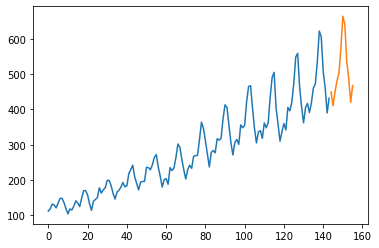

In [16]:
import numpy as np
data_air=data.set_index('month')
plt.plot(np.arange(144), data_air)
plt.plot(np.arange(144, 144+12), forecast)
plt.show()

# Darts

Darts is another time series Python library developed by Unit8 for easy manipulation and forecasting of time series. This idea was to make darts as simple to use as sklearn for time-series. Darts attempts to smooth the overall process of using time series in machine learning. Darts has two models: Regression models (predicts output with time as input) and Forecasting models (predicts future output based on past values).

In [ ]:
! pip install darts

In [18]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(data, 'month', '#Passengers')

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [19]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



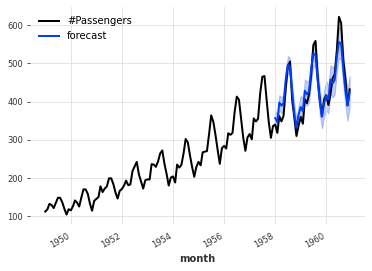

In [21]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

# **Result:**

Yes the results are slightly differ by comparing each other, most probably the values are closer to one another. 
I prefer Darts as it is easy to manipulate and forecast of timeseries and provides accurate results also we can easily visualize the results